In [21]:
%matplotlib notebook

# Matplotlib API Primer

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

<IPython.core.display.Javascript object>


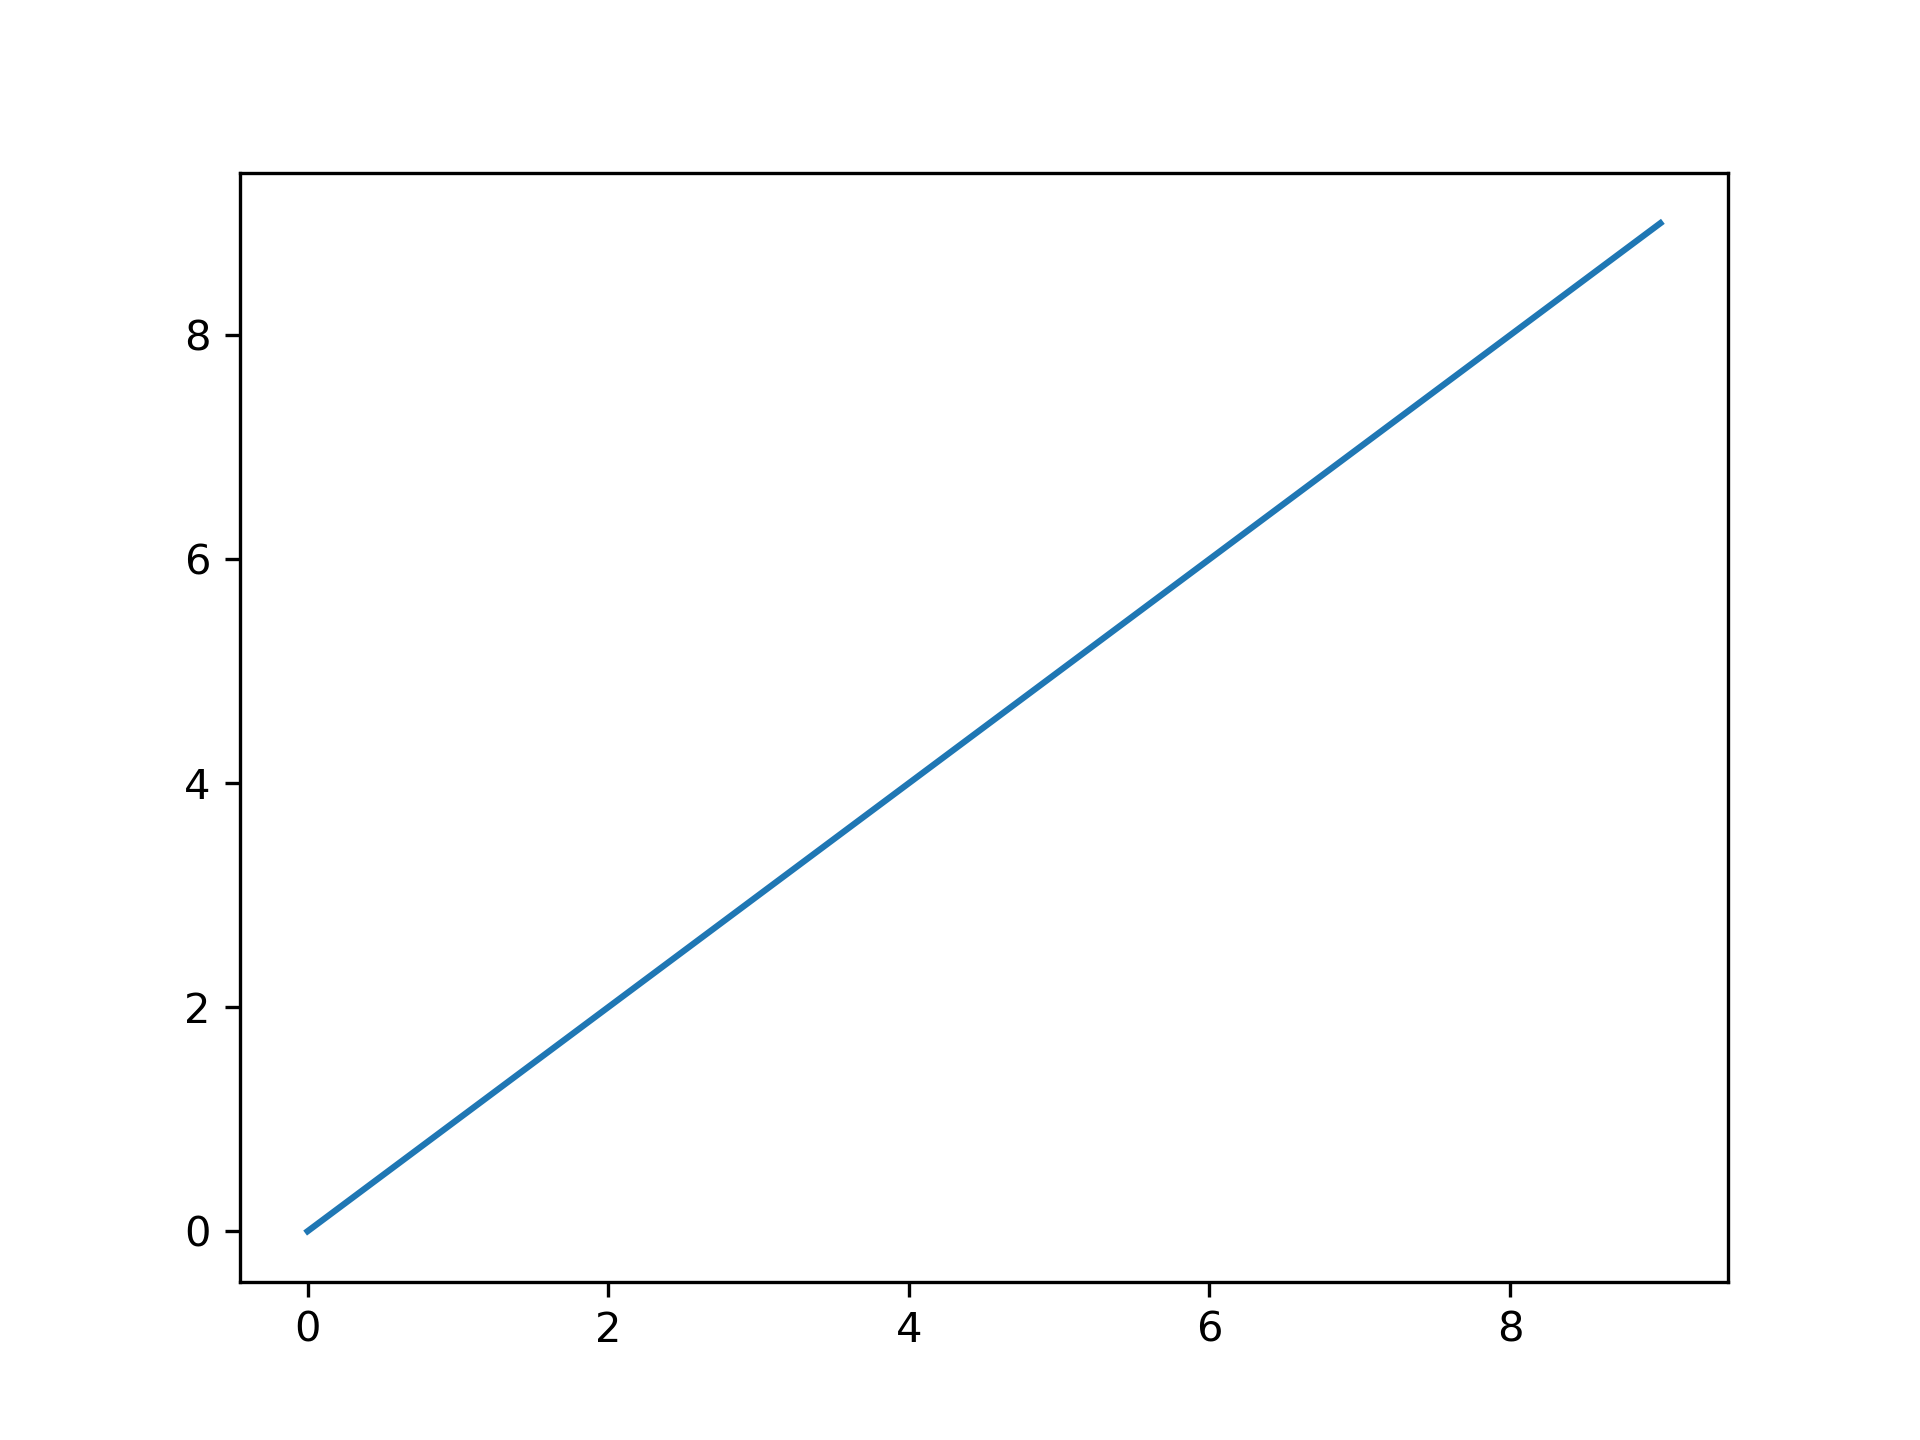

In [38]:
data=np.arange(10)
plt.figure()
plt.plot(data)
plt.show()

## Figures and Subplots

<IPython.core.display.Javascript object>


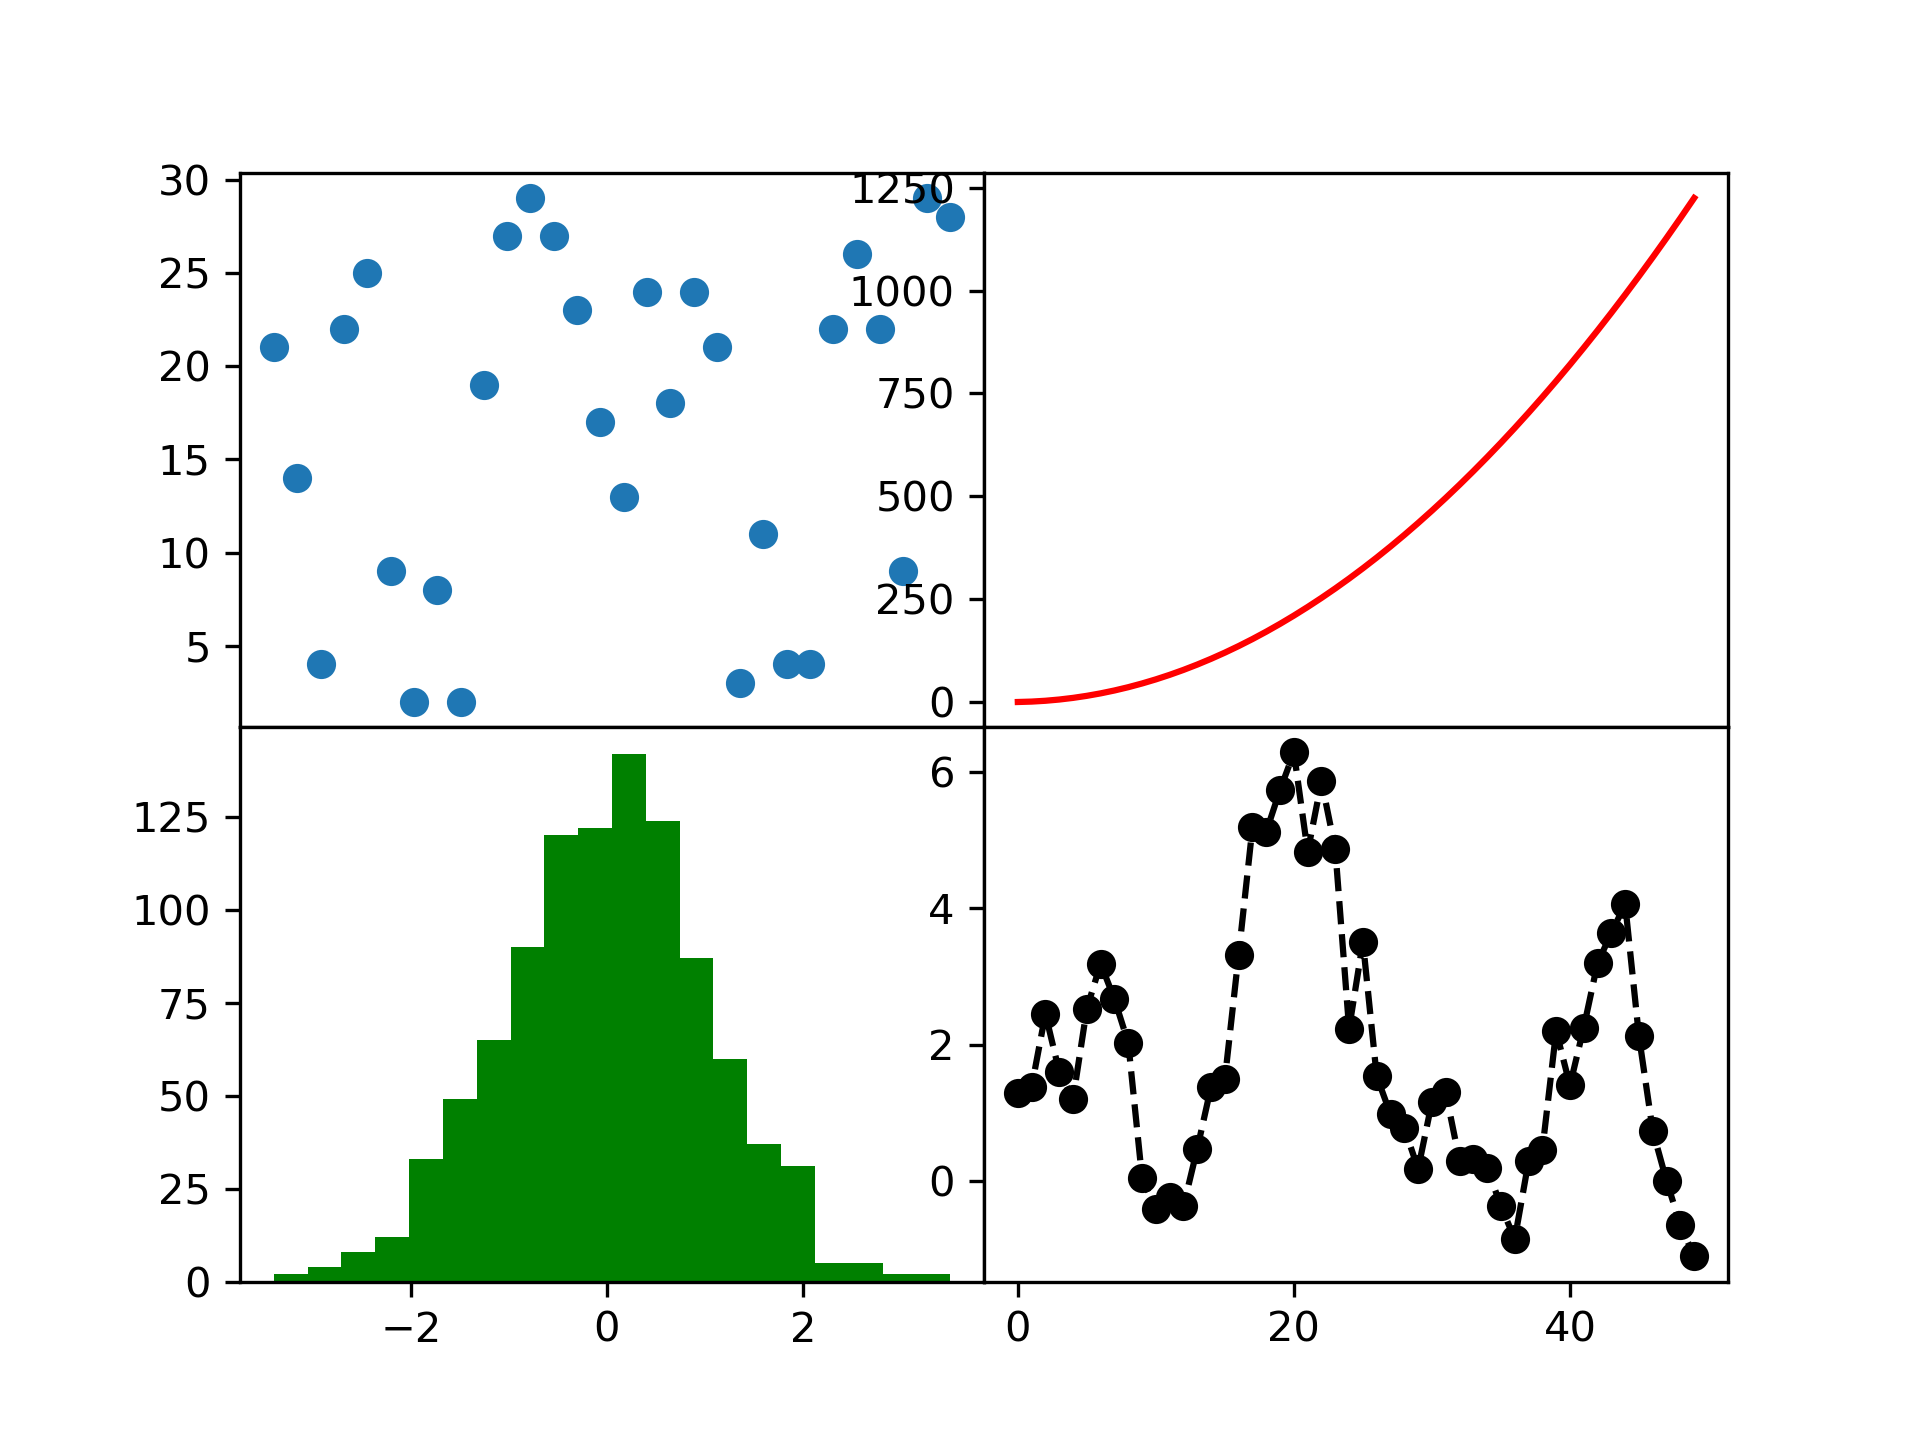

In [39]:
fig = plt.figure()
ax1=plt.subplot(2,2,1)
ax2=plt.subplot(222)
ax3=plt.subplot(223)
ax4=plt.subplot(224)
ax1.scatter(np.arange(30), np.random.randint(30, size=(30)))
ax2.plot(np.arange(50).cumsum(),'r')
ax3.hist(np.random.randn(1000), bins=20, color='green')
plt.plot(np.random.randn(50).cumsum(), 'ko--')
plt.subplots_adjust(wspace=0, hspace=0)

<IPython.core.display.Javascript object>


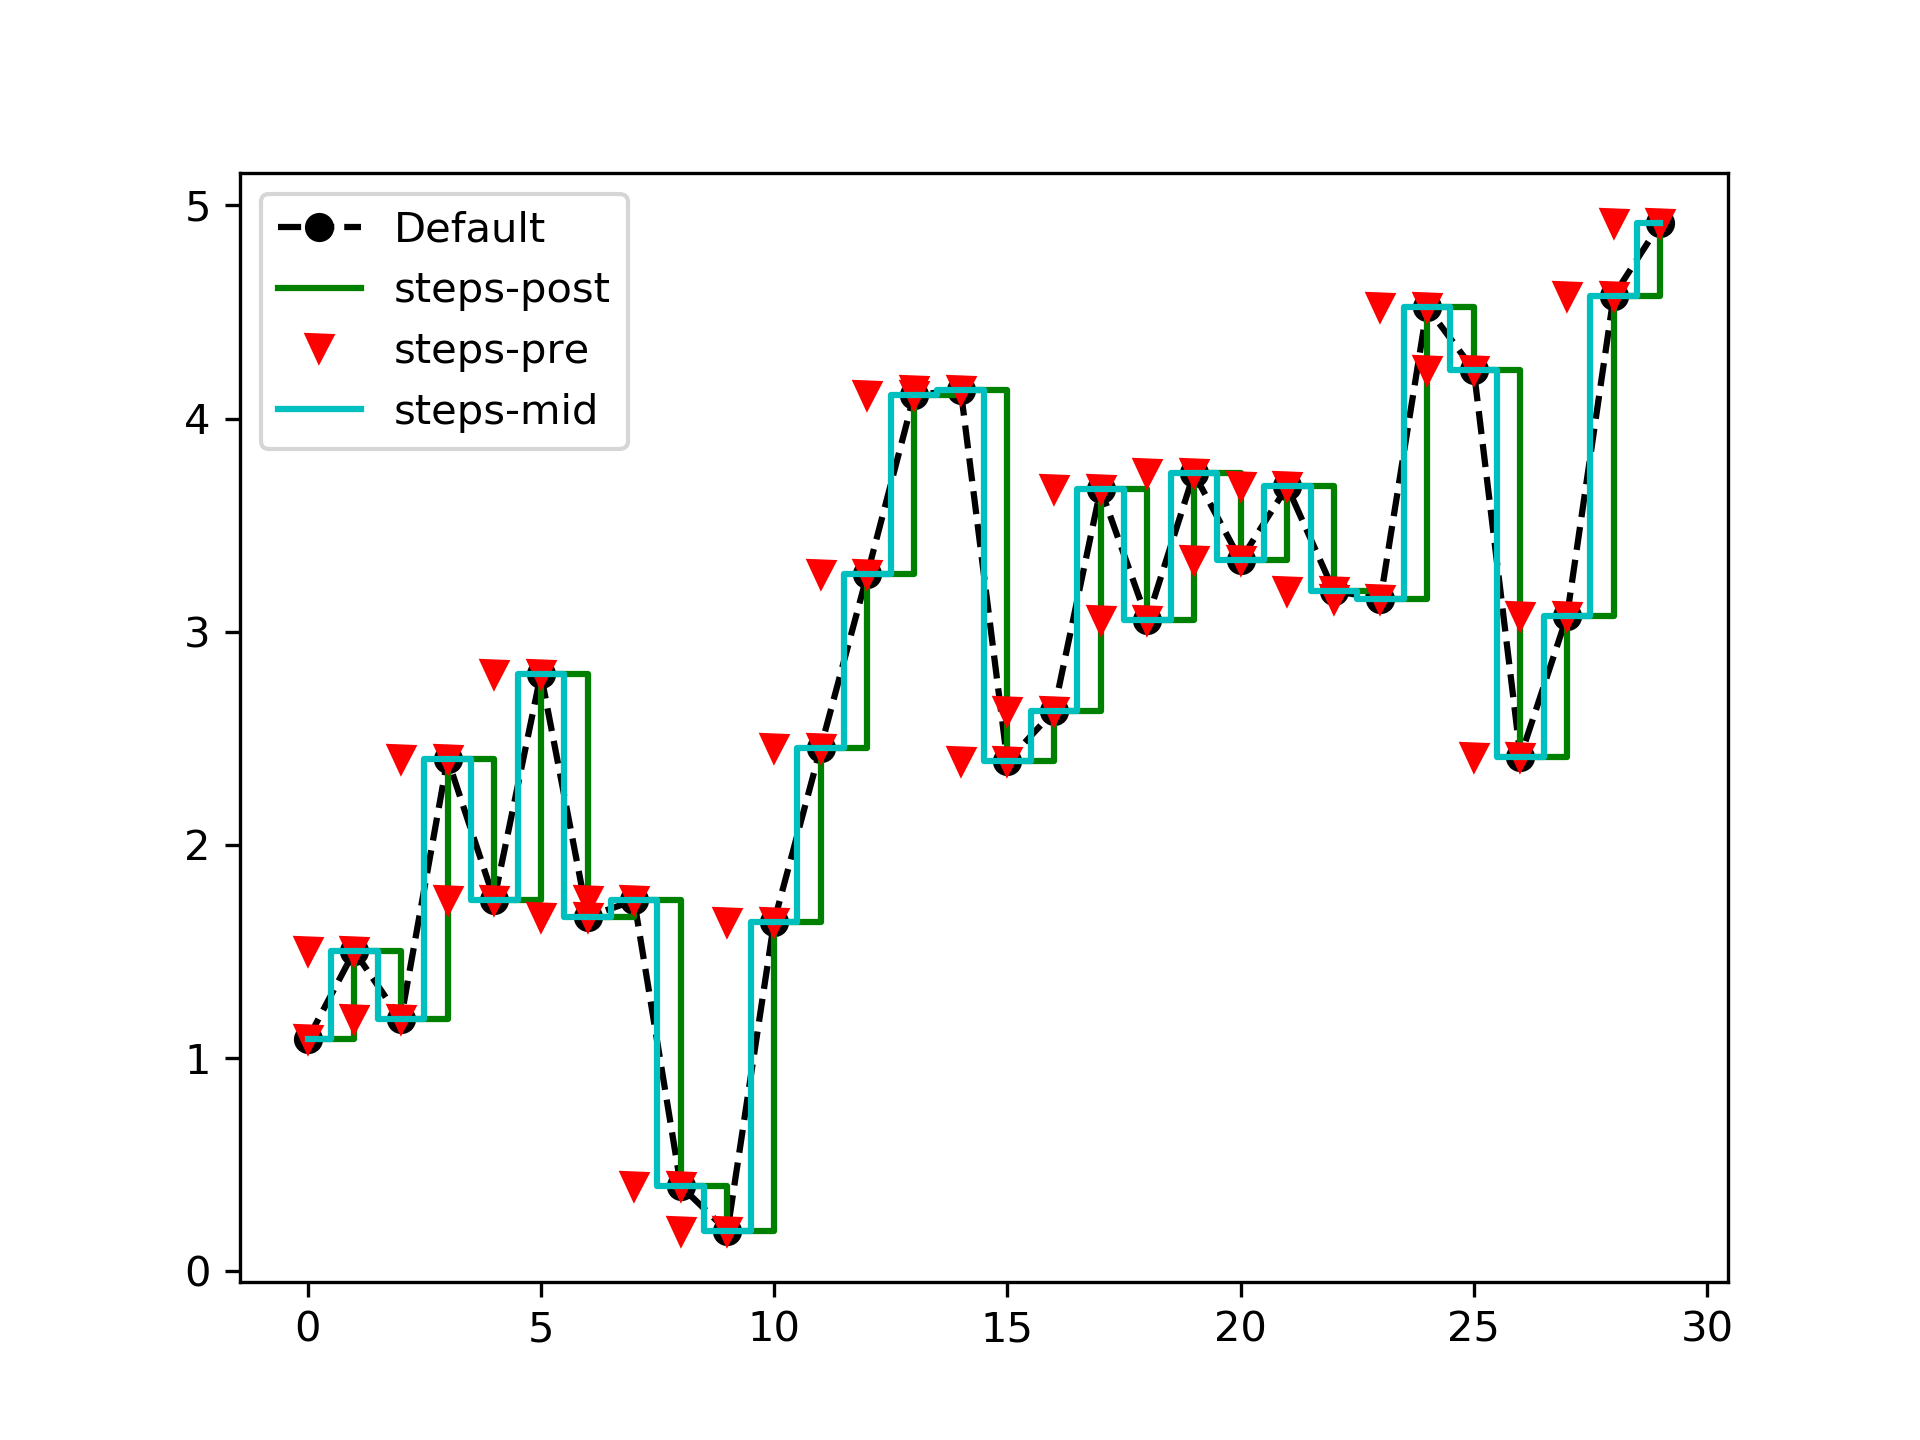

In [53]:
fig,axes=plt.subplots(1,1,sharex=True,sharey=True)
data=np.random.randn(30).cumsum()
ax0=axes
ax0.plot(data,'ko--', label='Default')
ax0.plot(data,'g',drawstyle='steps-post', label='steps-post')
ax0.plot(data,'rv',drawstyle='steps-pre', label='steps-pre')
ax0.plot(data,'c',drawstyle='steps-mid', label='steps-mid')
ax0.legend()

<IPython.core.display.Javascript object>


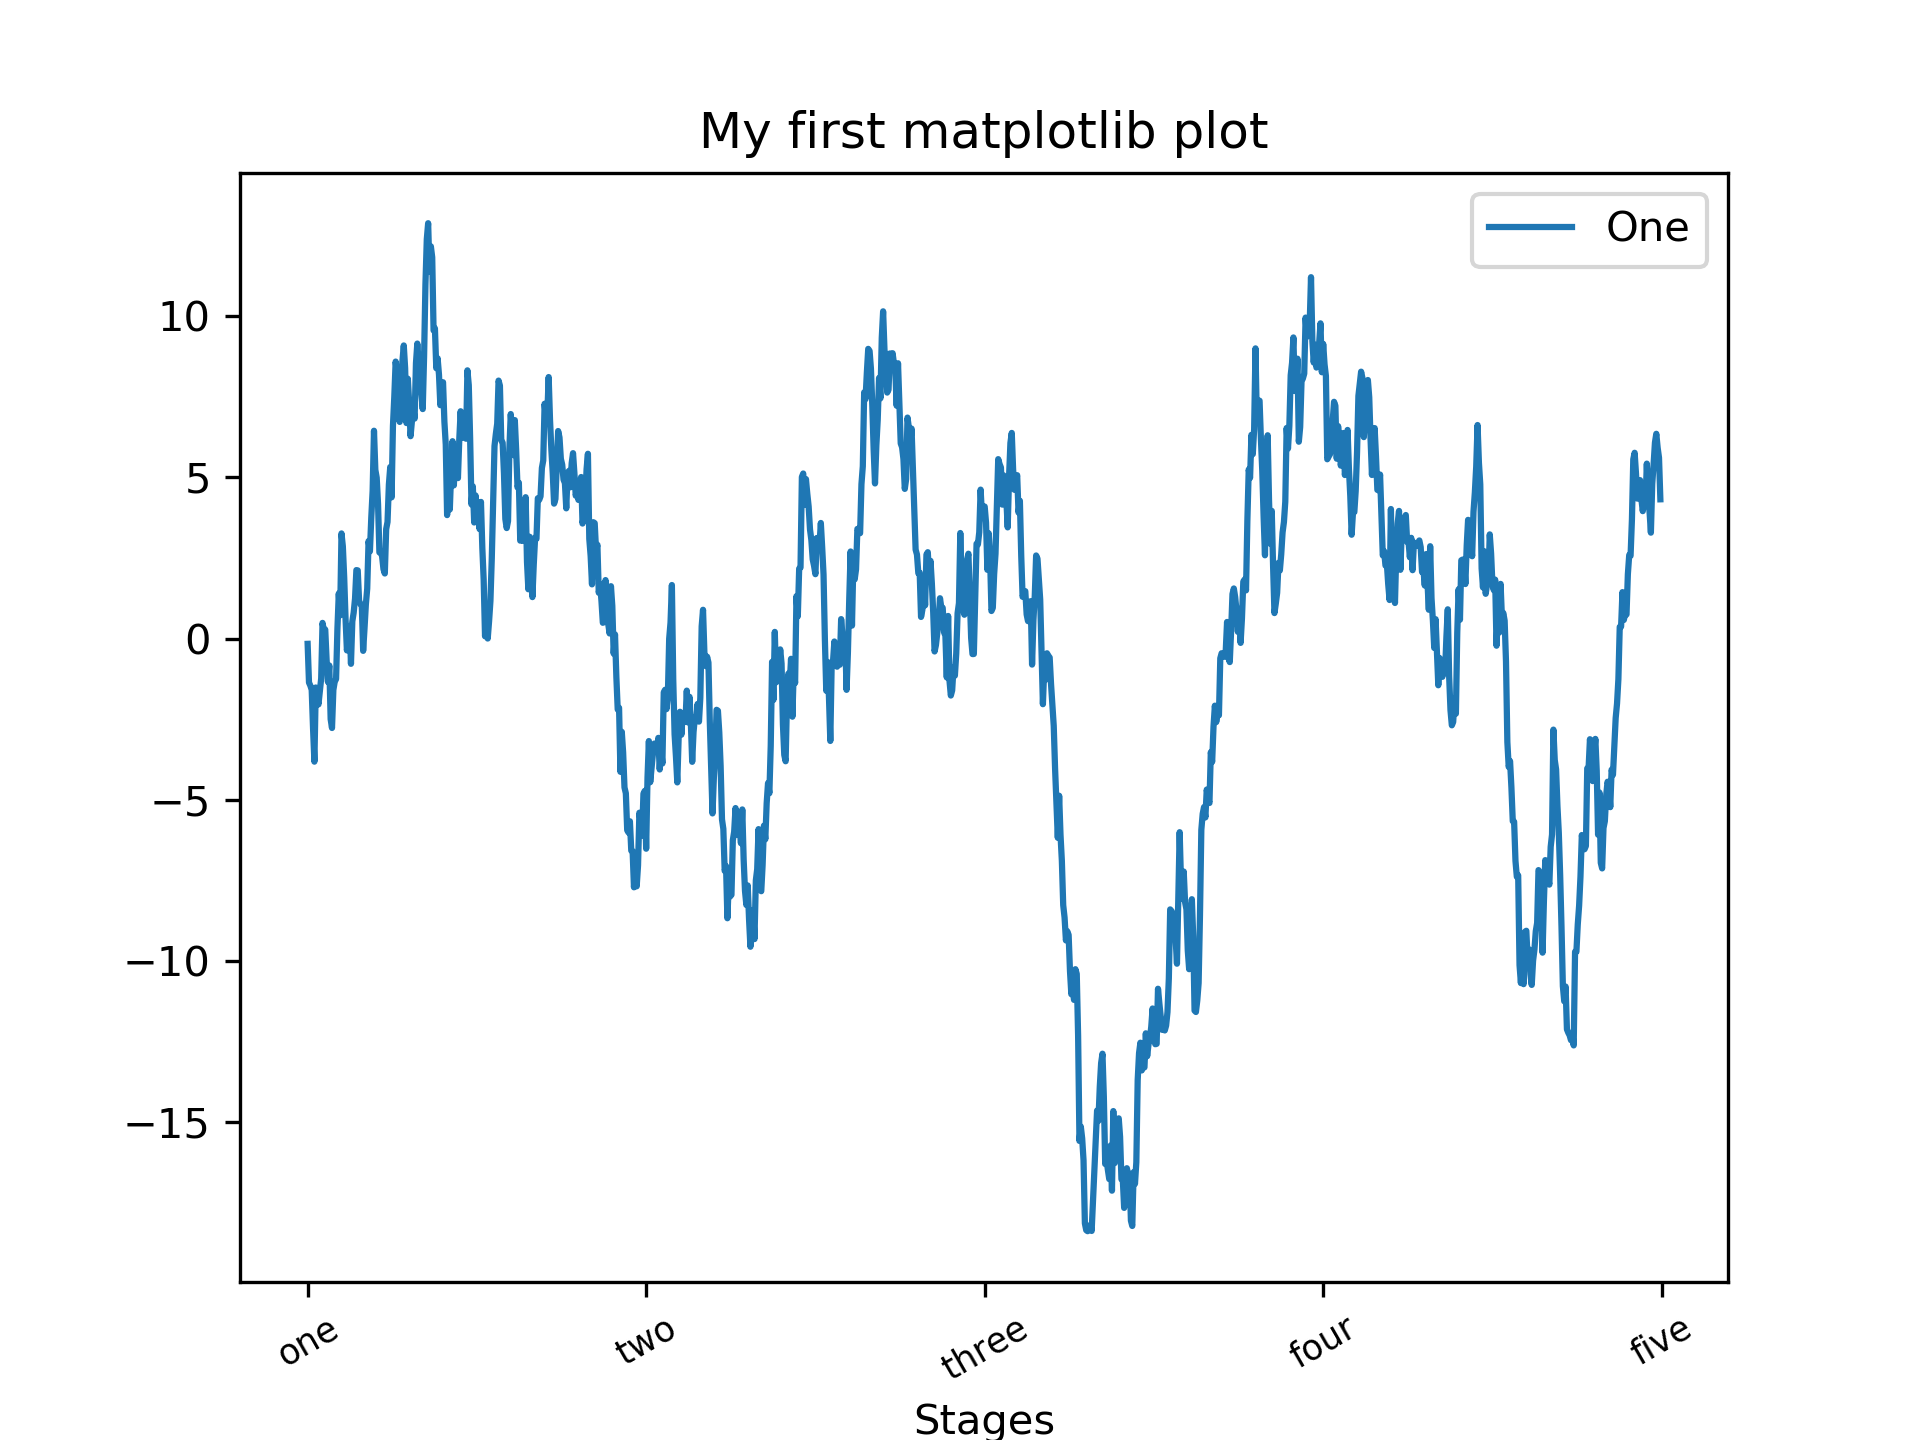

In [67]:
fig=plt.figure()
data=np.random.randn(1000).cumsum()
ax=fig.add_subplot(1,1,1)
ax.set_xticks([0,250,500,750,1000])
ax.set_xticklabels(['one','two','three','four','five'], rotation=30, fontsize='small')
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')
ax.plot(data, label='One')
ax.legend()

In [68]:
ax.legend?

<IPython.core.display.Javascript object>


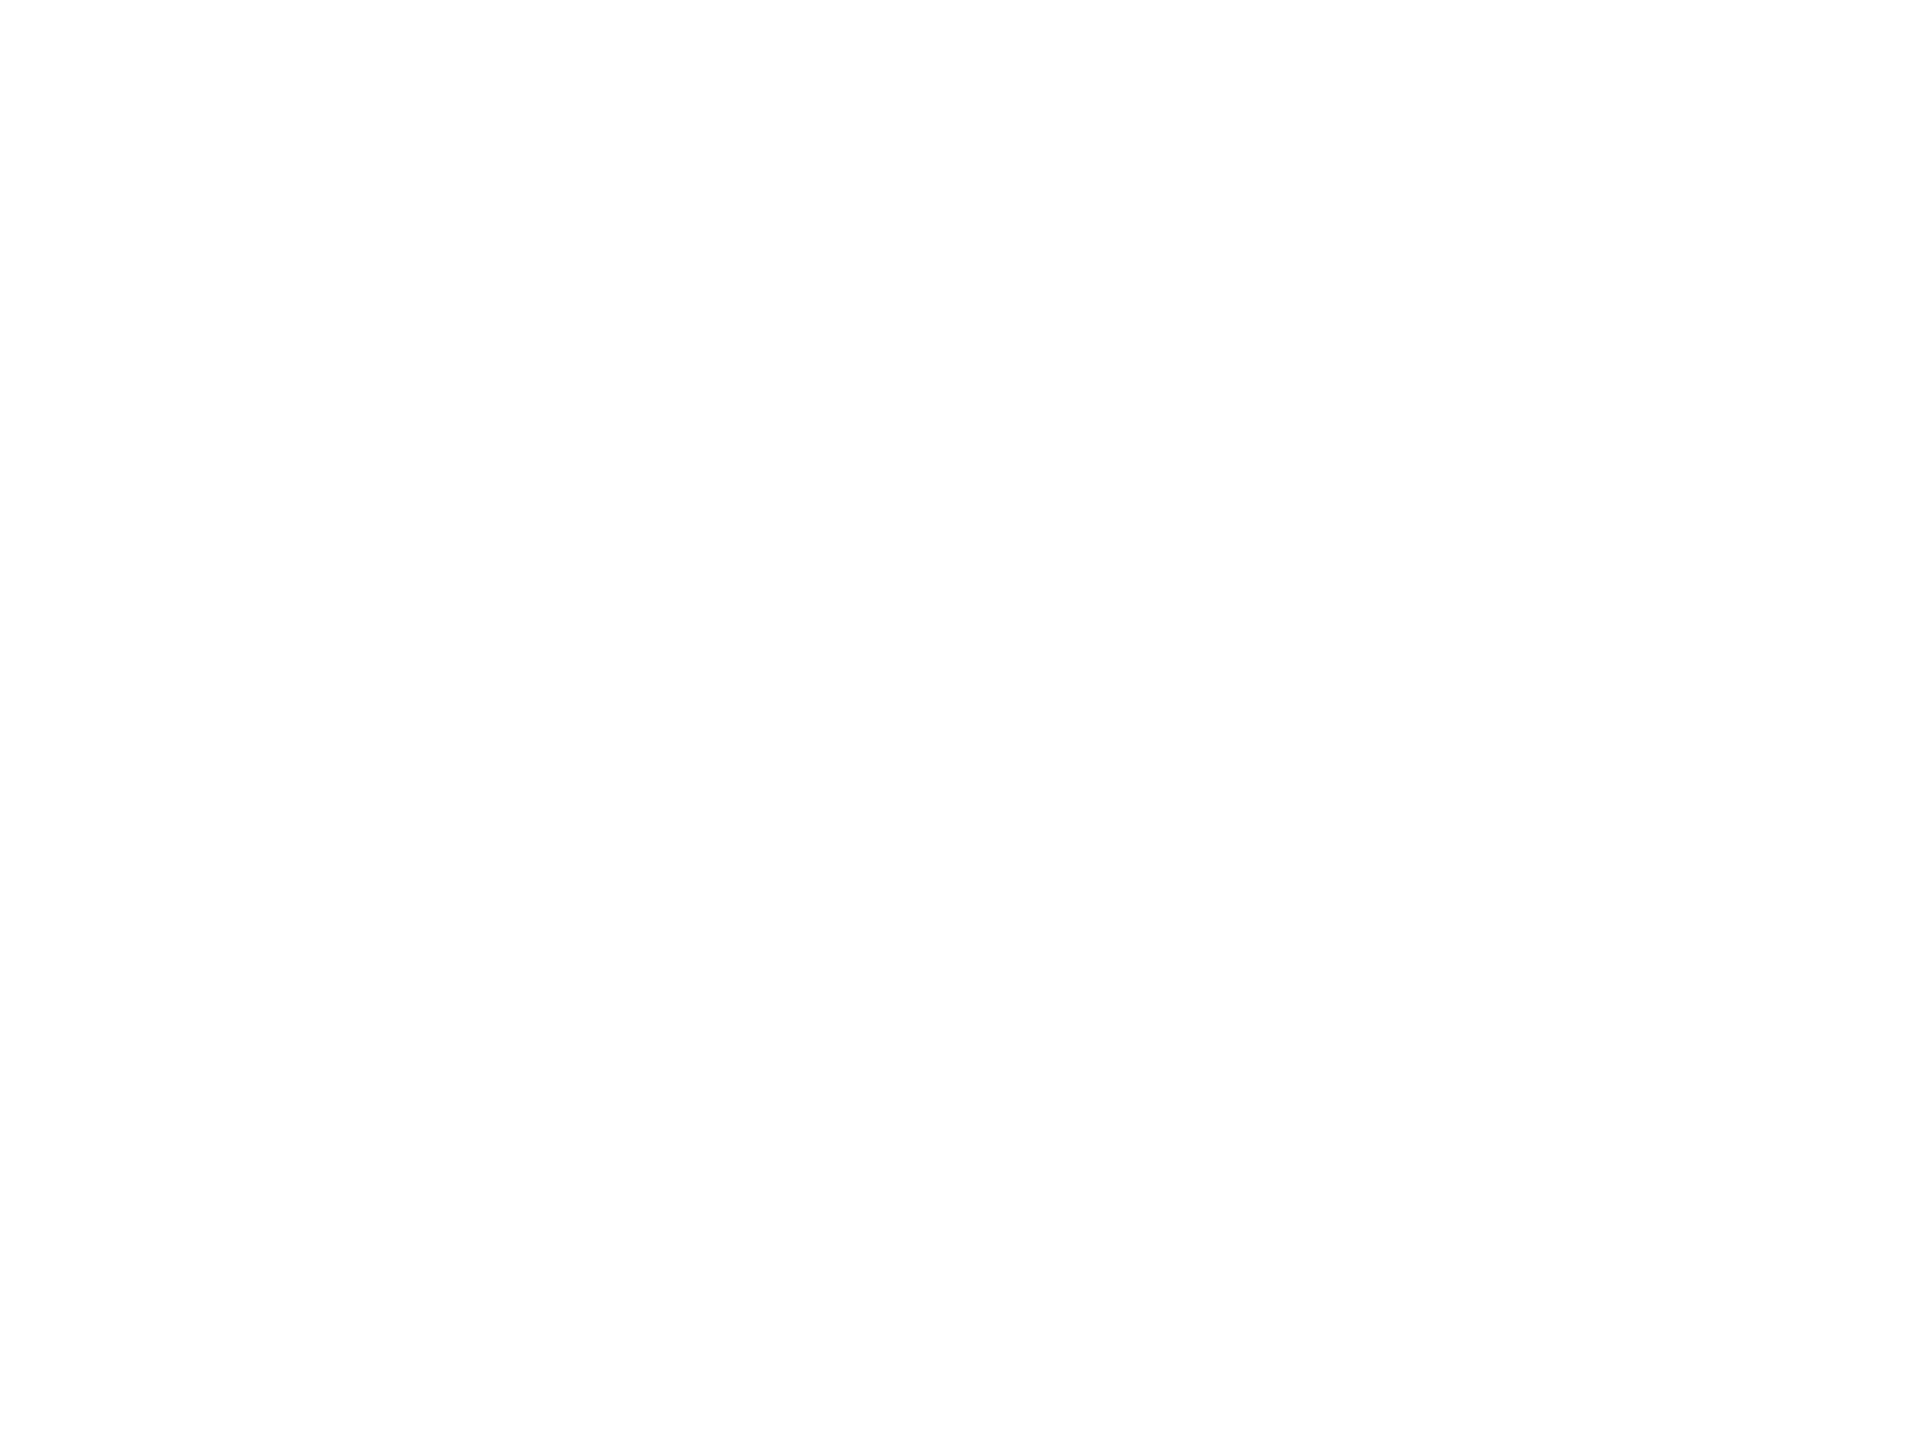

Text(0.5,1,'Important dates in the 2008-2009 financial crisis')

In [86]:
from datetime import datetime
fig = plt.figure()
ax=fig.add_subplot(1,1,1)
data=pd.read_csv('../examples/spx.csv', index_col=0,parse_dates=True)
spx=data['SPX']
spx.plot(ax=ax,style='k-')
crisis_data=[
    (datetime(2007,10,11),'Peak of bull market'),
    (datetime(2008,3,12), 'Bear Stearns fails'),
    (datetime(2008,9,15), 'Lehman bankruptcy')
]
for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date)+75), xytext=(date,spx.asof(date)+225),
               arrowprops=dict(facecolor='black', headwidth=4, width=2, headlength=4), horizontalalignment='left',
               verticalalignment='top')
ax.set_xlim(['1/1/2007','1/1/2011'])
ax.set_ylim([600, 1800])
ax.set_title('Important dates in the 2008-2009 financial crisis')

## Plotting with pandas and seaborn

<IPython.core.display.Javascript object>


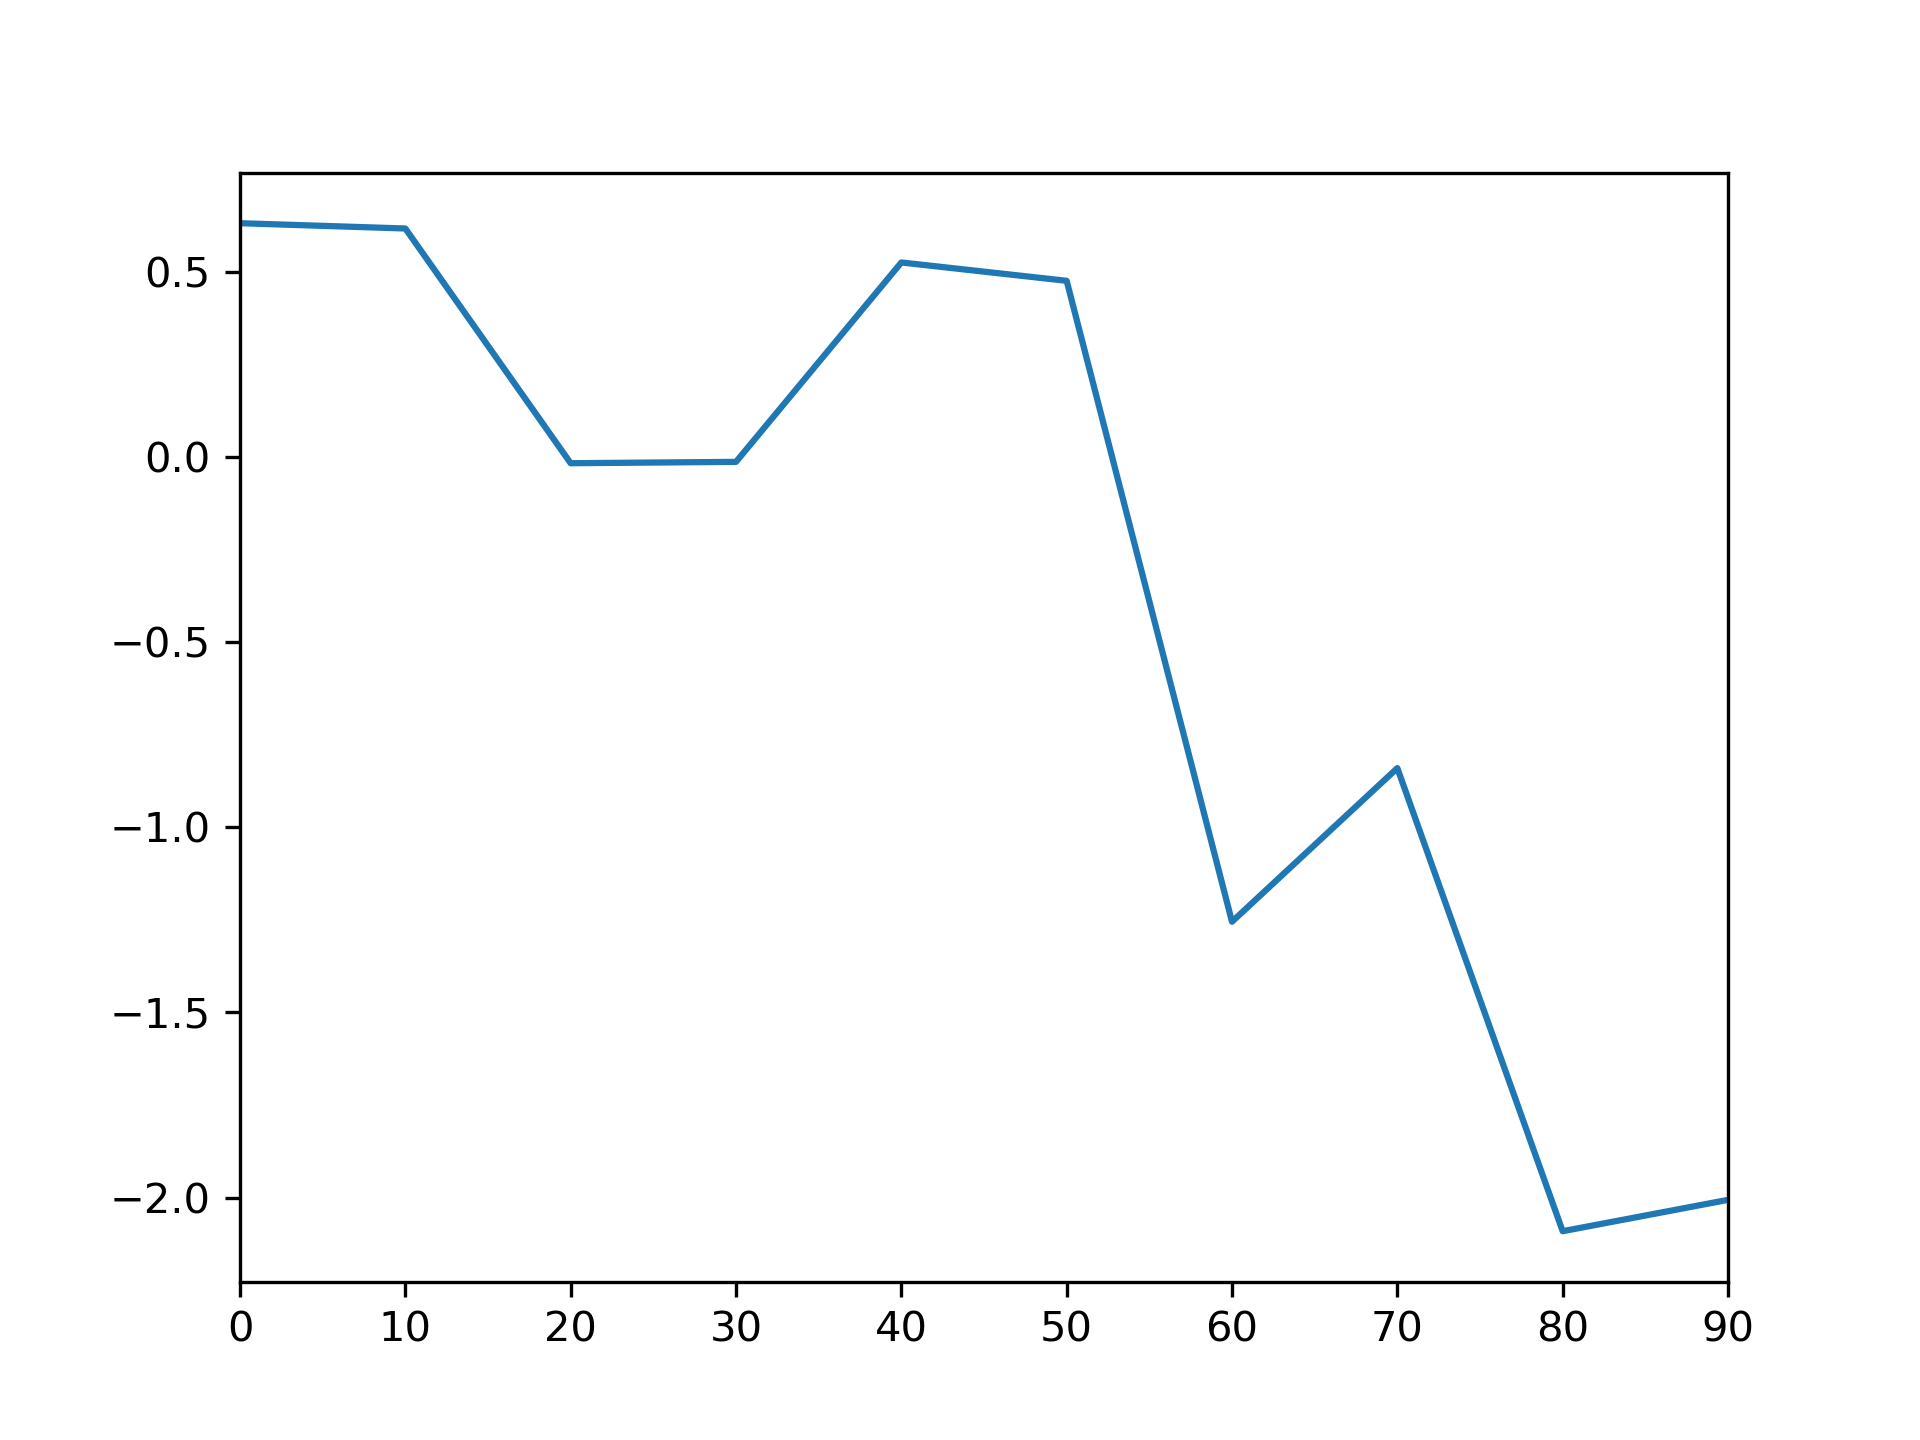

In [94]:
s=Series(np.random.randn(10).cumsum(),index=np.arange(0,100,10))
plt.figure()
s.plot()

<IPython.core.display.Javascript object>


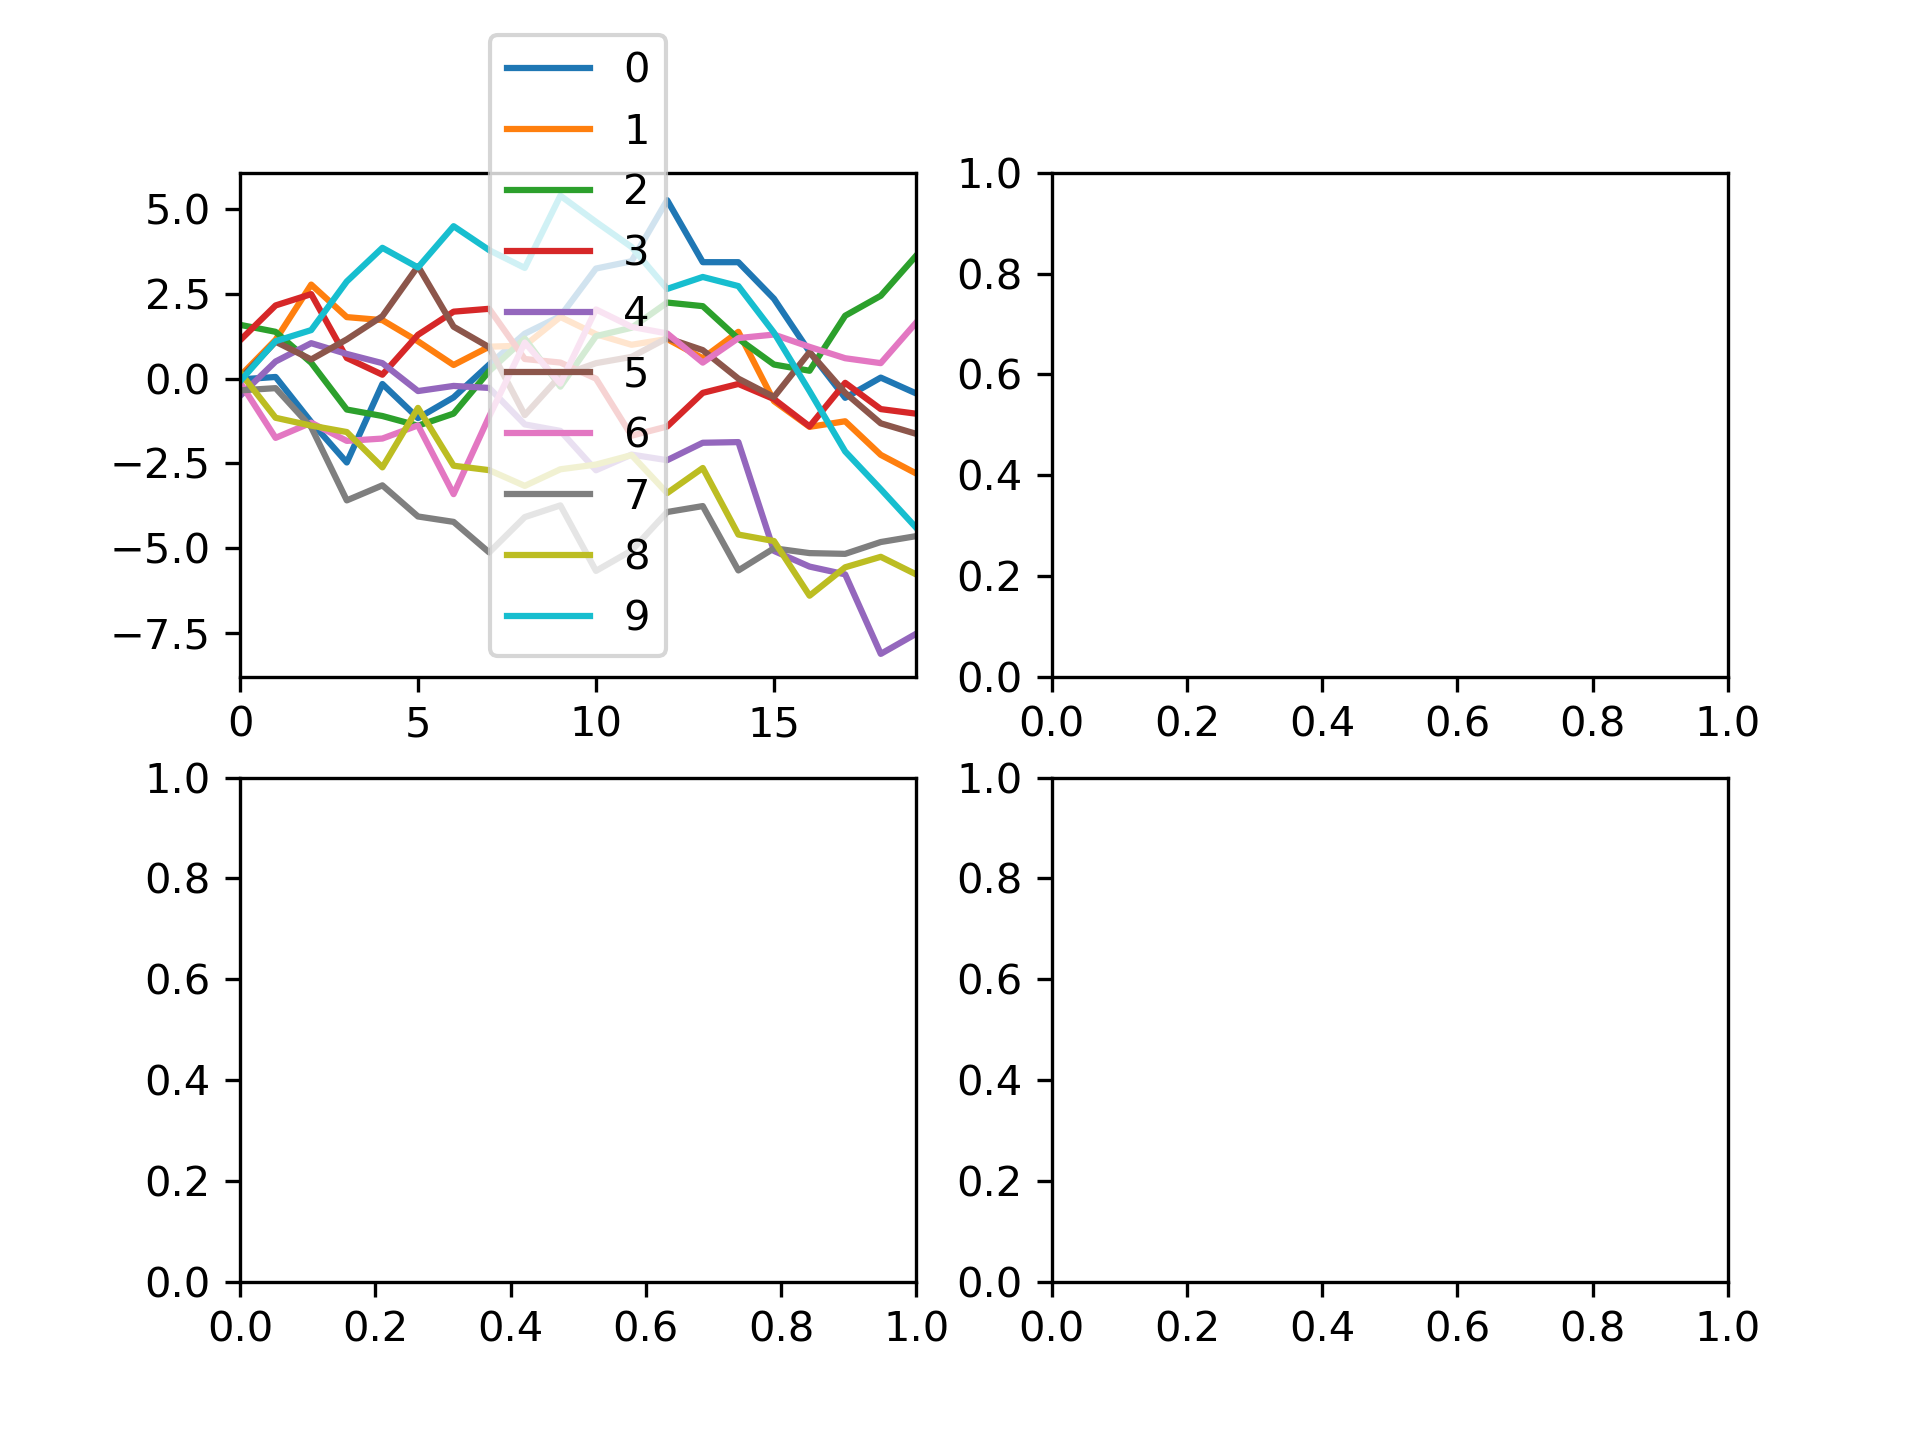

In [110]:
data=DataFrame(np.random.randn(20,10).cumsum(axis=0))
fig,axes=plt.subplots(2,2)
ax=axes[0,0]

data.plot(ax=ax)


<IPython.core.display.Javascript object>


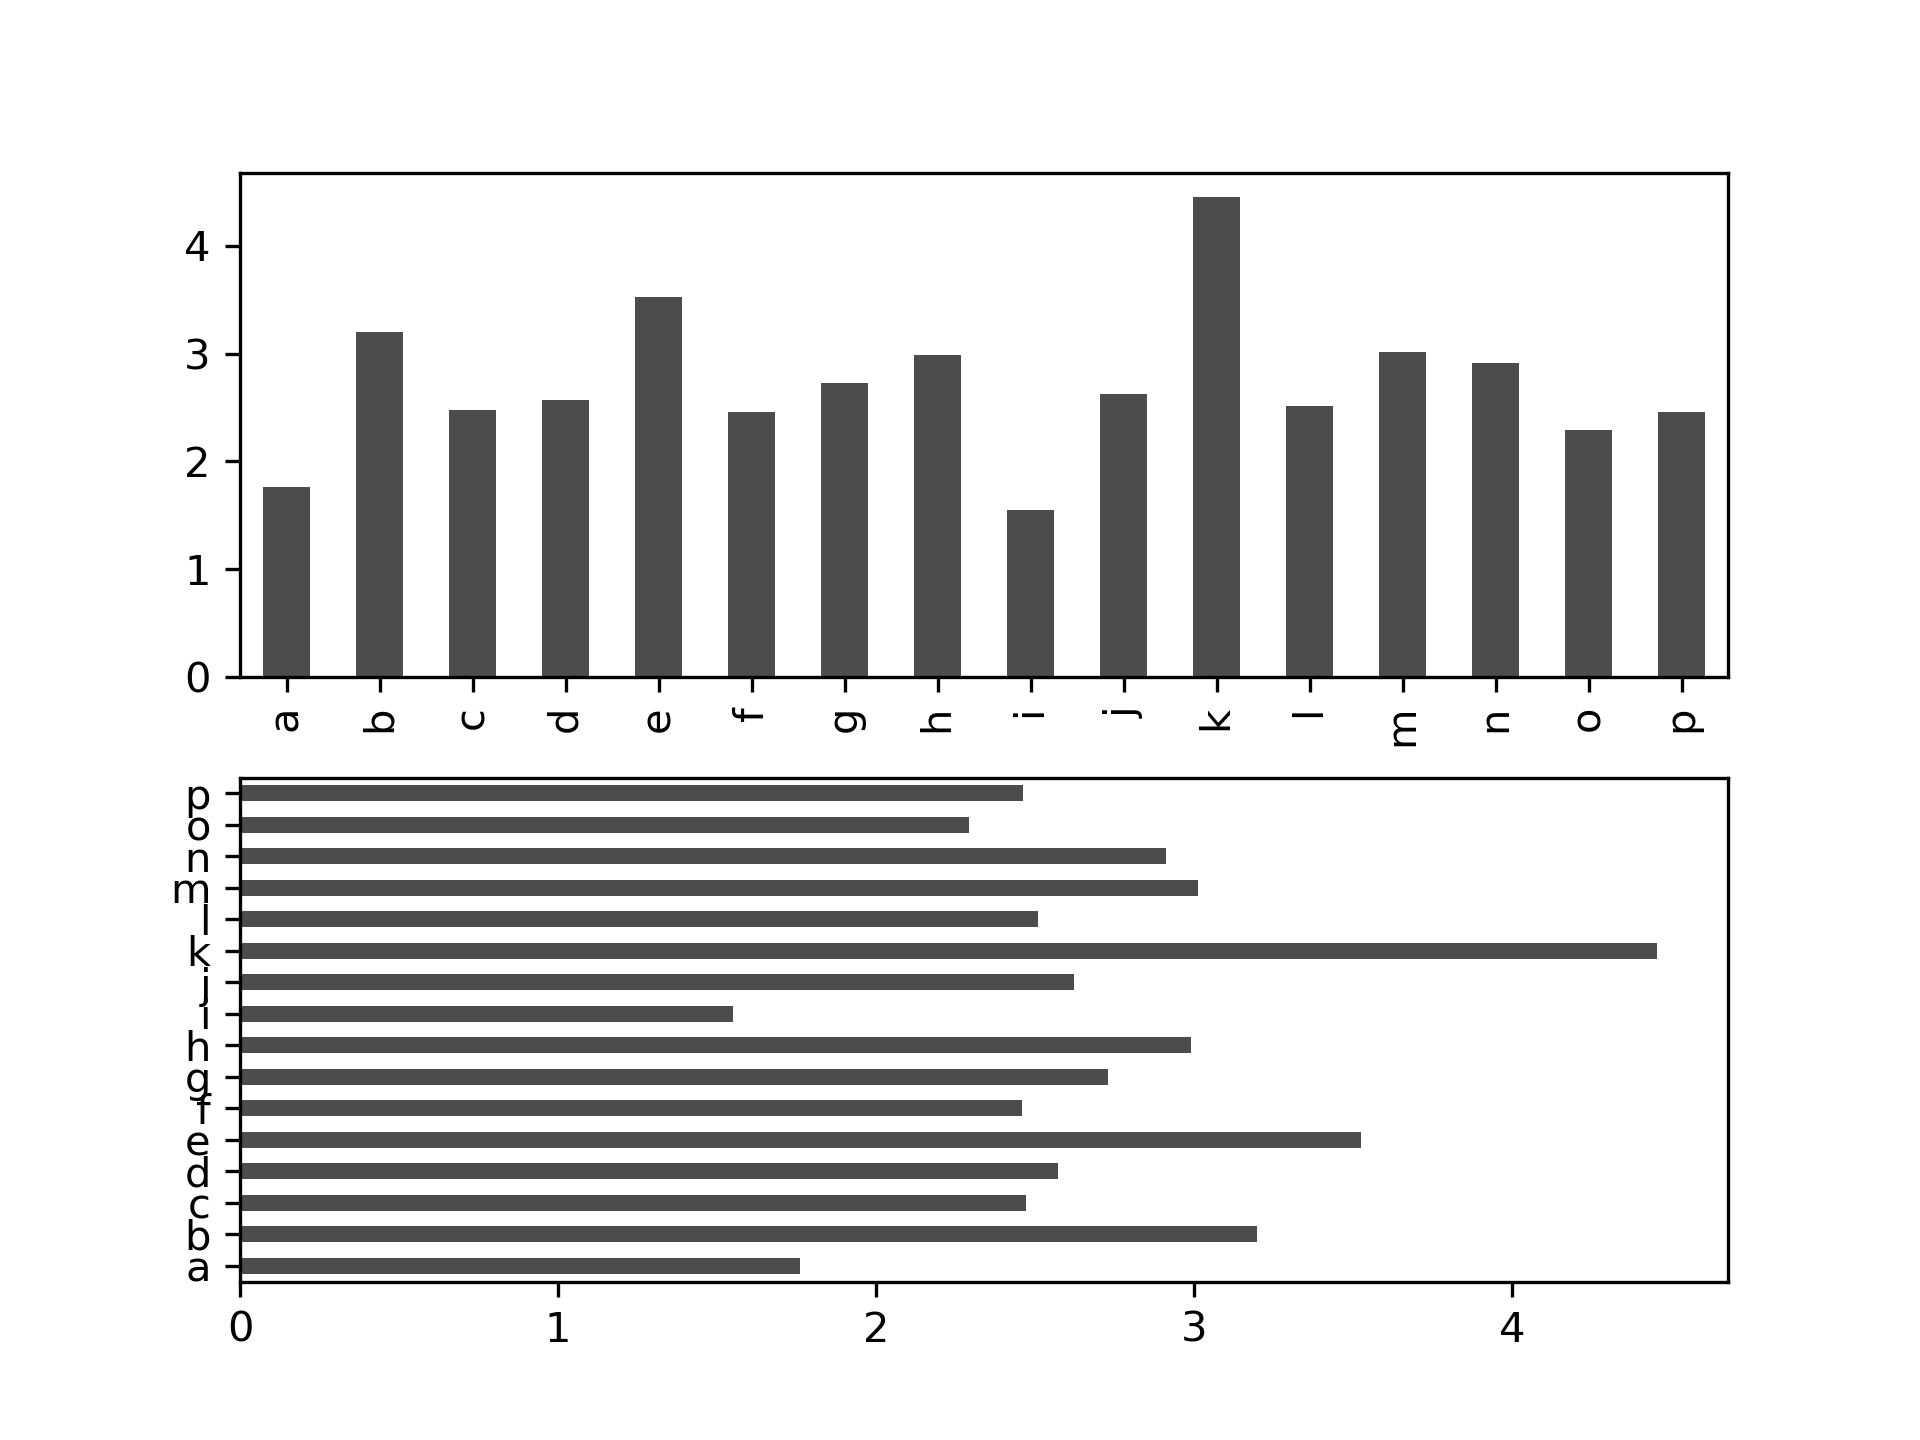

In [117]:
fig,axes=plt.subplots(2,1)
data = Series(np.random.randn(16)+3,index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0],color='k',alpha=0.7)
data.plot.barh(ax=axes[1],color='k',alpha=0.7)

<IPython.core.display.Javascript object>


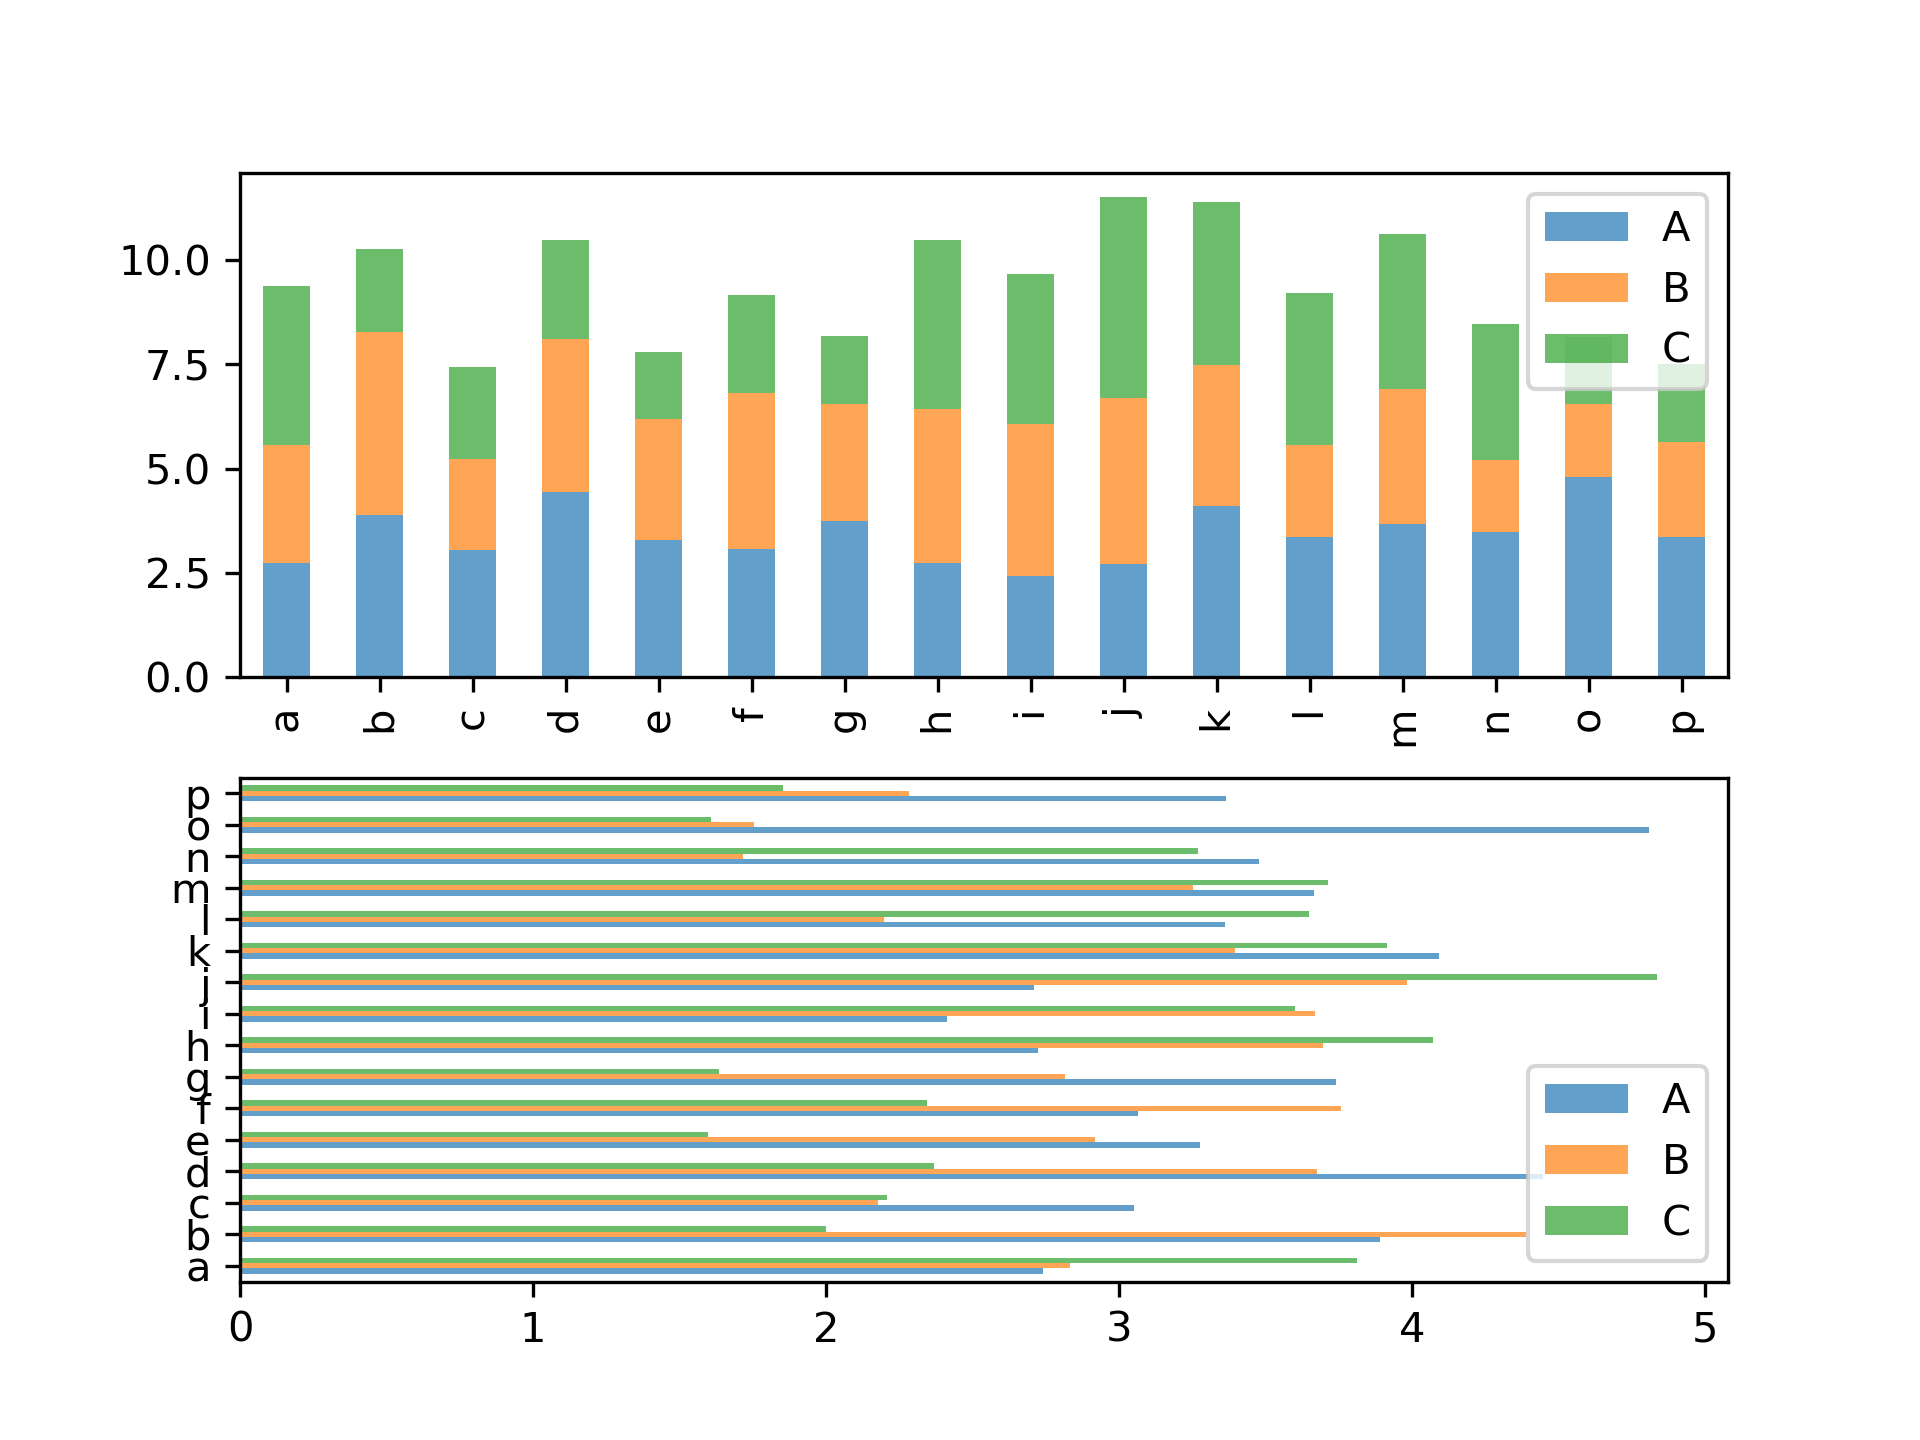

In [123]:
fig,axes=plt.subplots(2,1)
data = DataFrame(np.random.randn(16,3)+3,index=list('abcdefghijklmnop'),columns=list('ABC'))
data.plot.bar(ax=axes[0],alpha=0.7,stacked=True)
data.plot.barh(ax=axes[1],alpha=0.7)

In [124]:
tips=pd.read_csv('../examples/tips.csv')
tips

total_bill   tip smoker   day    time  size
0         16.99  1.01     No   Sun  Dinner     2
1         10.34  1.66     No   Sun  Dinner     3
2         21.01  3.50     No   Sun  Dinner     3
3         23.68  3.31     No   Sun  Dinner     2
4         24.59  3.61     No   Sun  Dinner     4
..          ...   ...    ...   ...     ...   ...
239       29.03  5.92     No   Sat  Dinner     3
240       27.18  2.00    Yes   Sat  Dinner     2
241       22.67  2.00    Yes   Sat  Dinner     2
242       17.82  1.75     No   Sat  Dinner     2
243       18.78  3.00     No  Thur  Dinner     2

[244 rows x 6 columns]

In [126]:
party_counts=pd.crosstab(tips['day'], tips['size'])
party_counts

size  1   2   3   4  5  6
day                      
Fri   1  16   1   1  0  0
Sat   2  53  18  13  1  0
Sun   0  39  15  18  3  1
Thur  1  48   4   5  1  3

In [130]:
party_counts.sum(axis=1)

day
Fri     19
Sat     87
Sun     76
Thur    62
dtype: int64

In [133]:
party_pcts=party_counts.div(party_counts.sum(axis=1),axis=0)
party_pcts

size         1         2         3         4         5         6
day                                                             
Fri   0.052632  0.842105  0.052632  0.052632  0.000000  0.000000
Sat   0.022989  0.609195  0.206897  0.149425  0.011494  0.000000
Sun   0.000000  0.513158  0.197368  0.236842  0.039474  0.013158
Thur  0.016129  0.774194  0.064516  0.080645  0.016129  0.048387

<IPython.core.display.Javascript object>


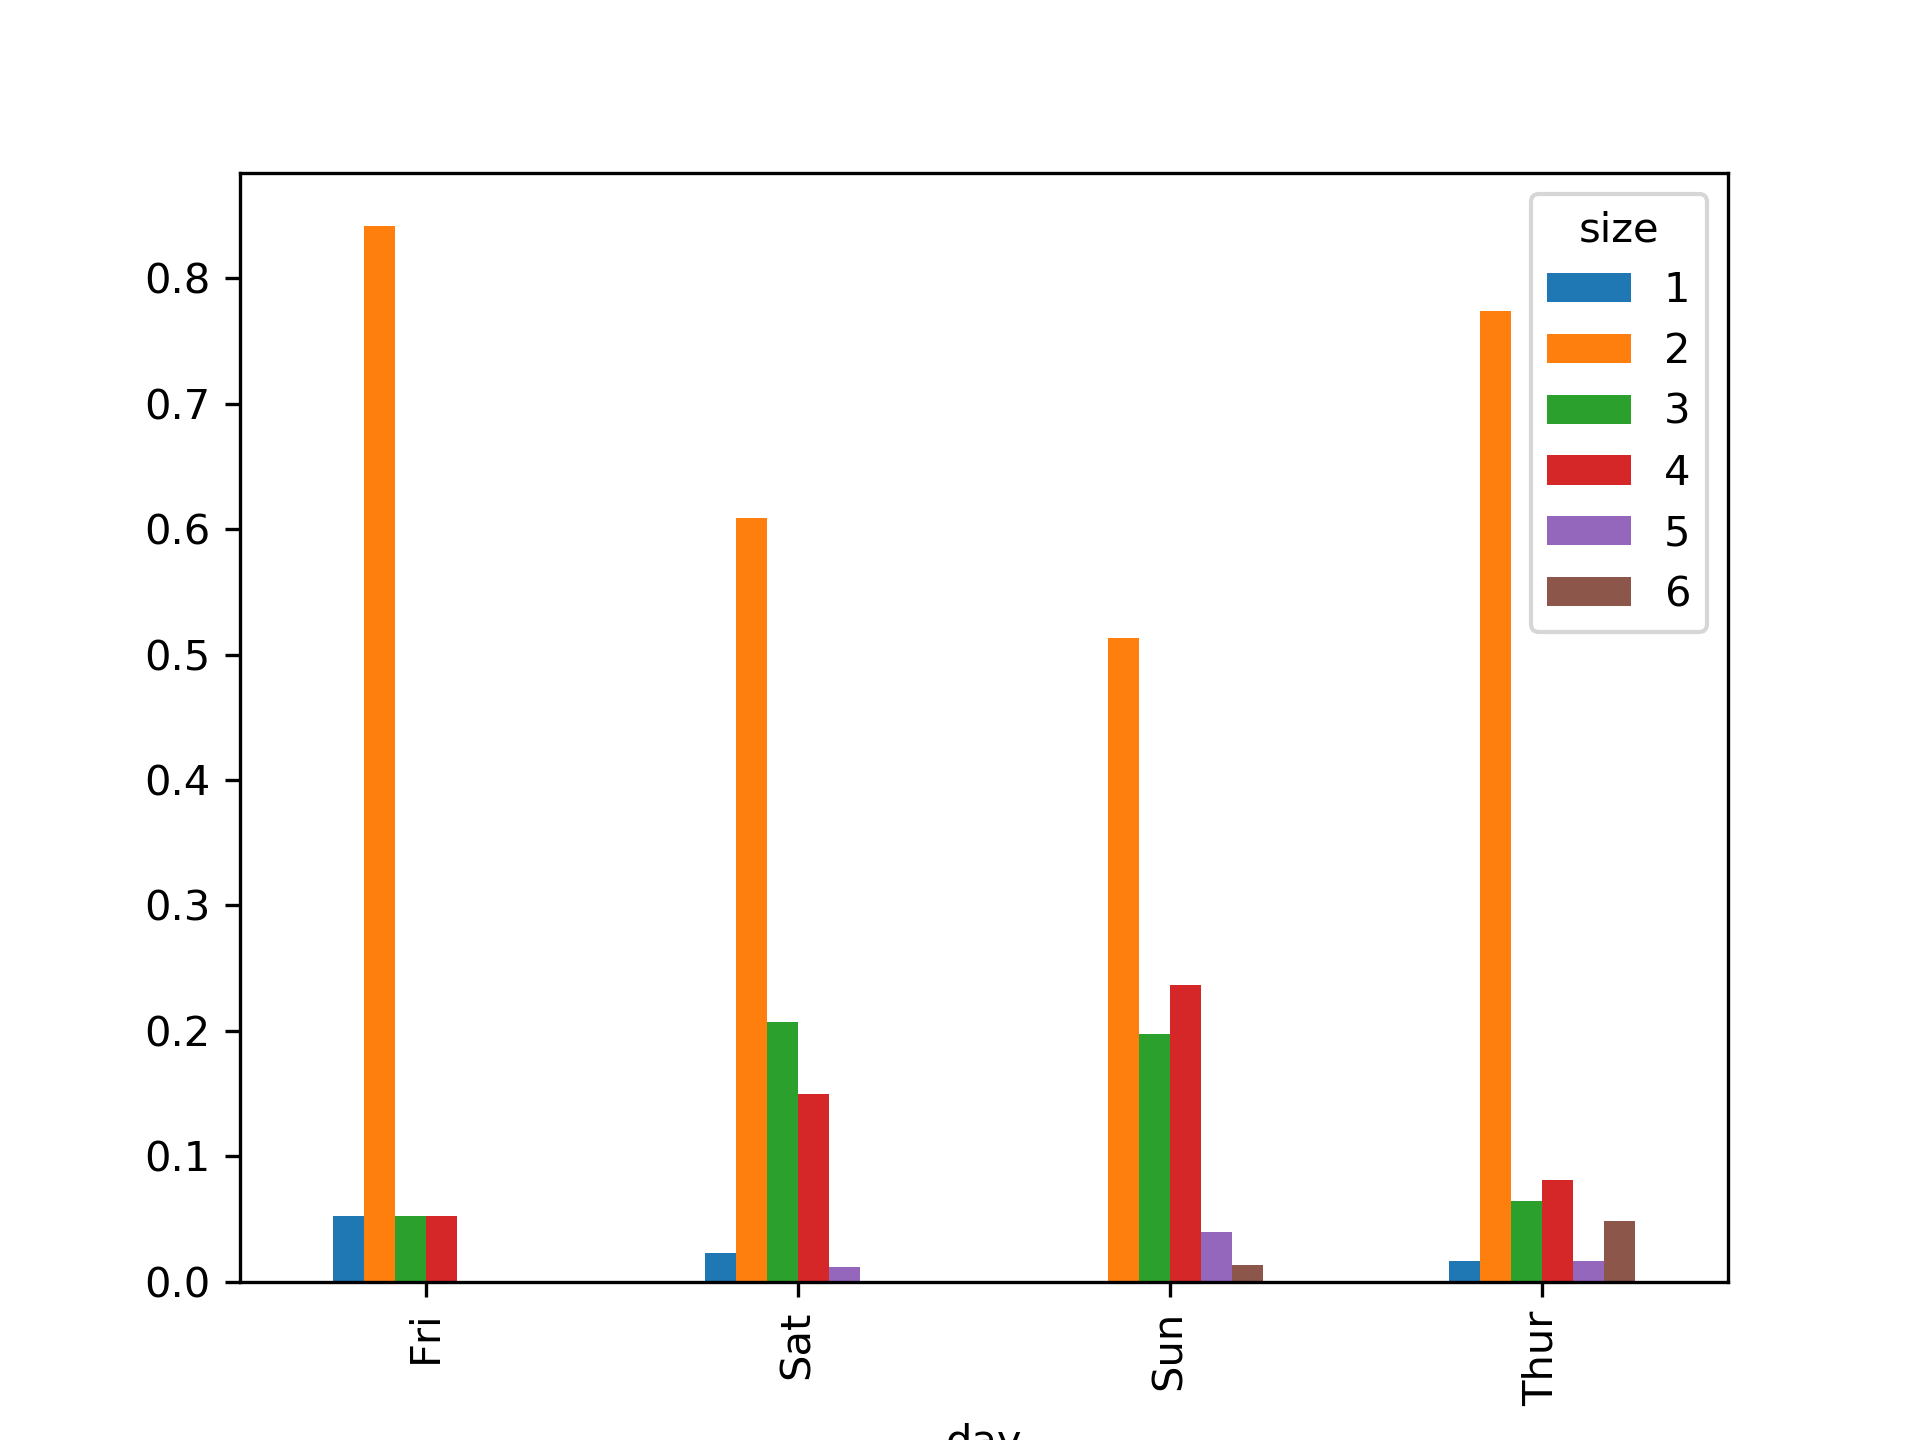

In [139]:
party_pcts.plot.bar()

In [143]:
tips['tip_pct']=tips.tip/(tips.total_bill-tips.tip)
tips

total_bill   tip smoker   day    time  size   tip_pct
0         16.99  1.01     No   Sun  Dinner     2  0.063204
1         10.34  1.66     No   Sun  Dinner     3  0.191244
2         21.01  3.50     No   Sun  Dinner     3  0.199886
3         23.68  3.31     No   Sun  Dinner     2  0.162494
4         24.59  3.61     No   Sun  Dinner     4  0.172069
..          ...   ...    ...   ...     ...   ...       ...
239       29.03  5.92     No   Sat  Dinner     3  0.256166
240       27.18  2.00    Yes   Sat  Dinner     2  0.079428
241       22.67  2.00    Yes   Sat  Dinner     2  0.096759
242       17.82  1.75     No   Sat  Dinner     2  0.108899
243       18.78  3.00     No  Thur  Dinner     2  0.190114

[244 rows x 7 columns]

In [137]:
import seaborn as sns

<IPython.core.display.Javascript object>


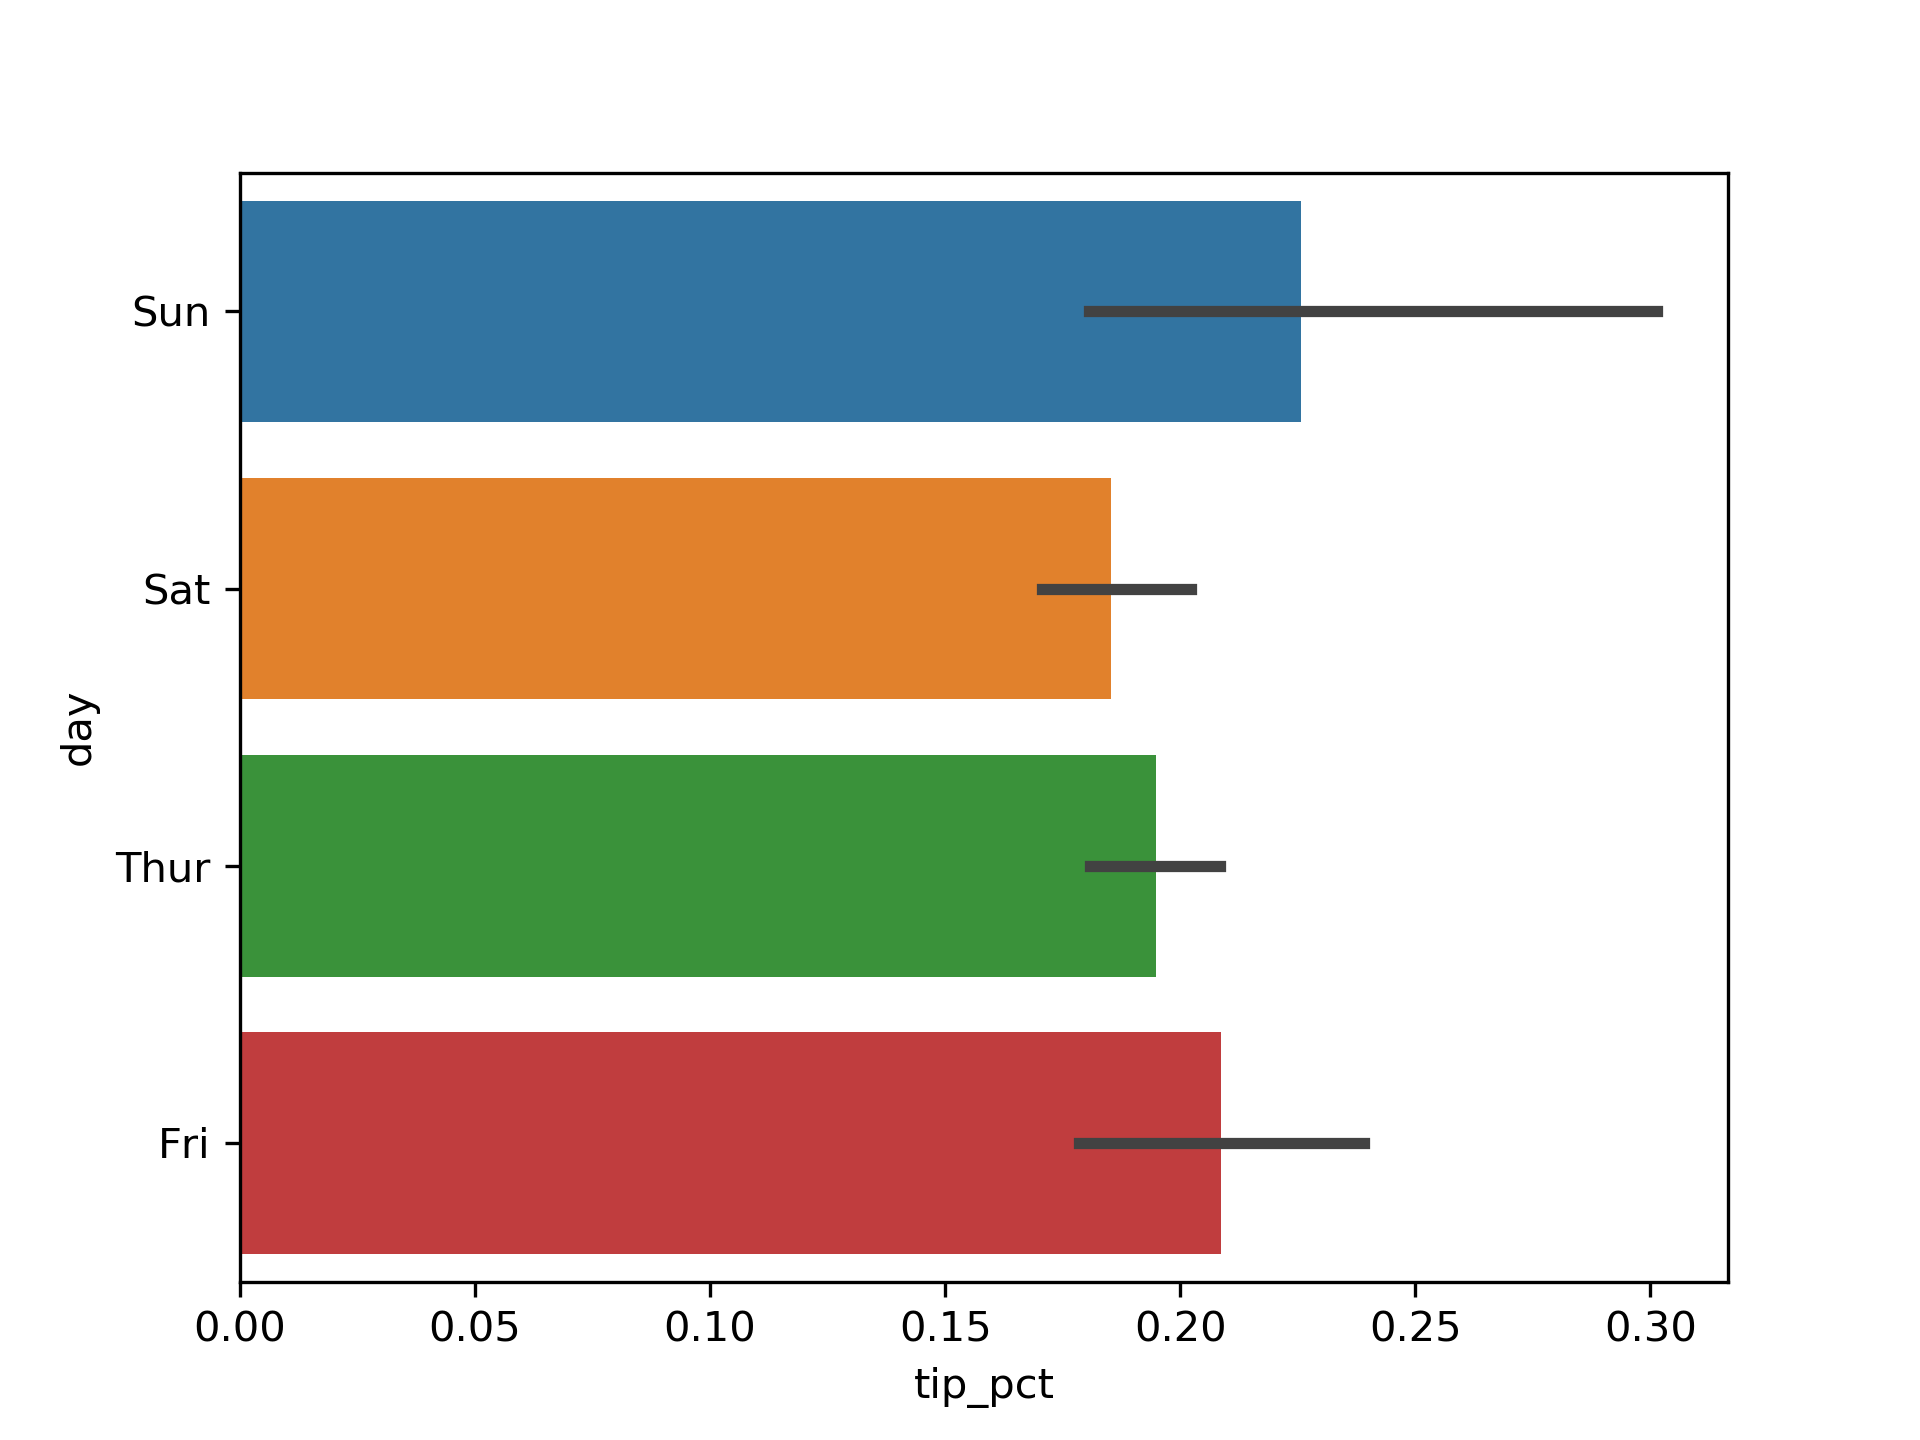

/Users/fengp/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


In [147]:
plt.figure()
sns.barplot(x='tip_pct',y='day',data=tips)

<IPython.core.display.Javascript object>


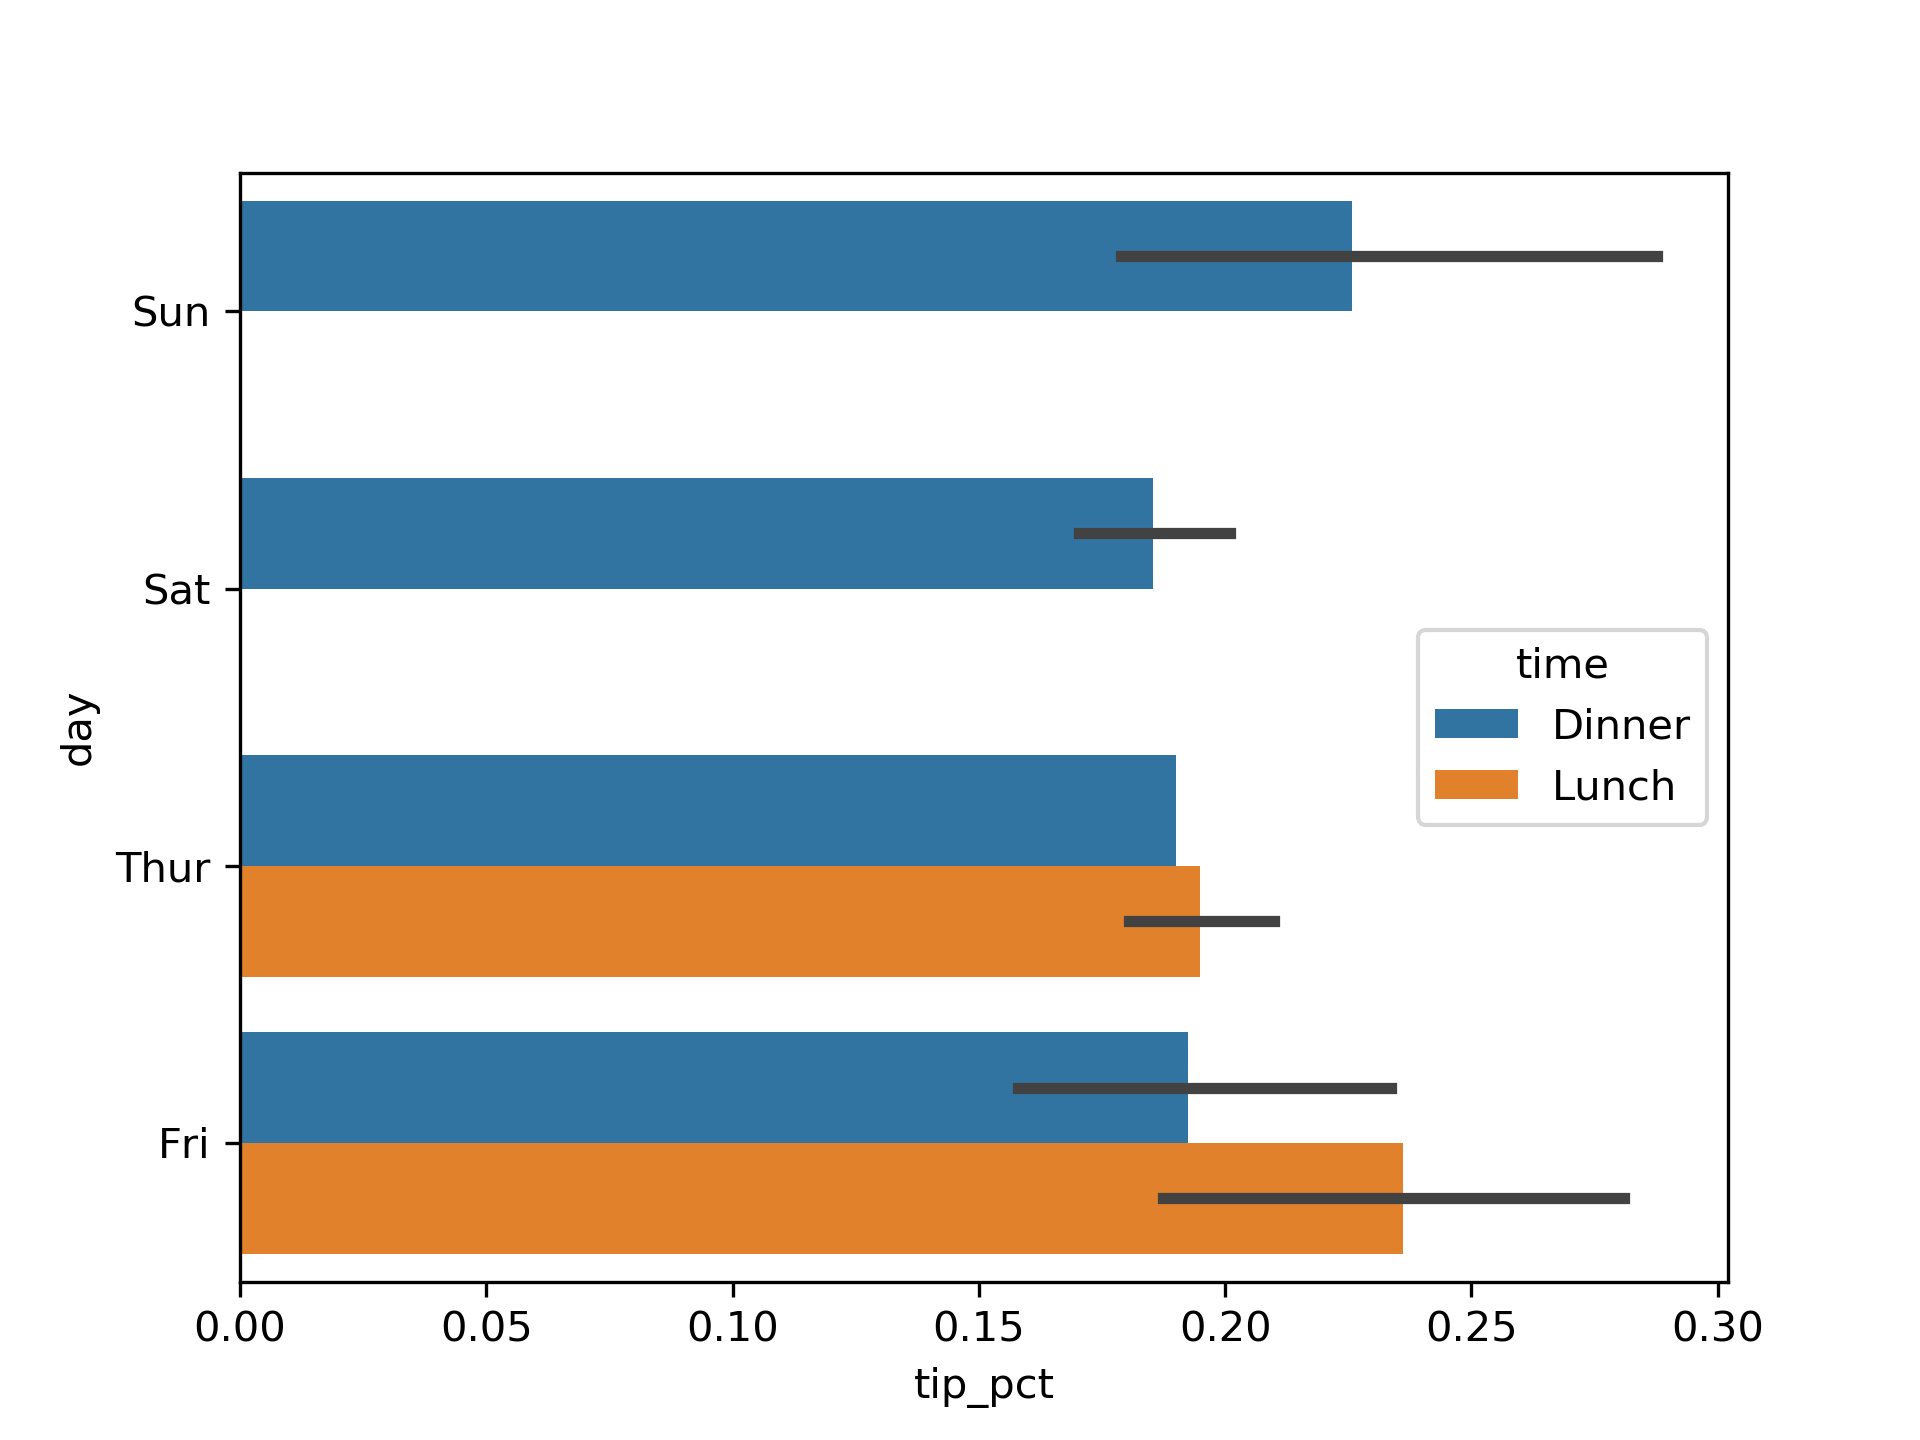

/Users/fengp/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


In [148]:
plt.figure()
sns.barplot(x='tip_pct',y='day',hue='time', data=tips)

<IPython.core.display.Javascript object>


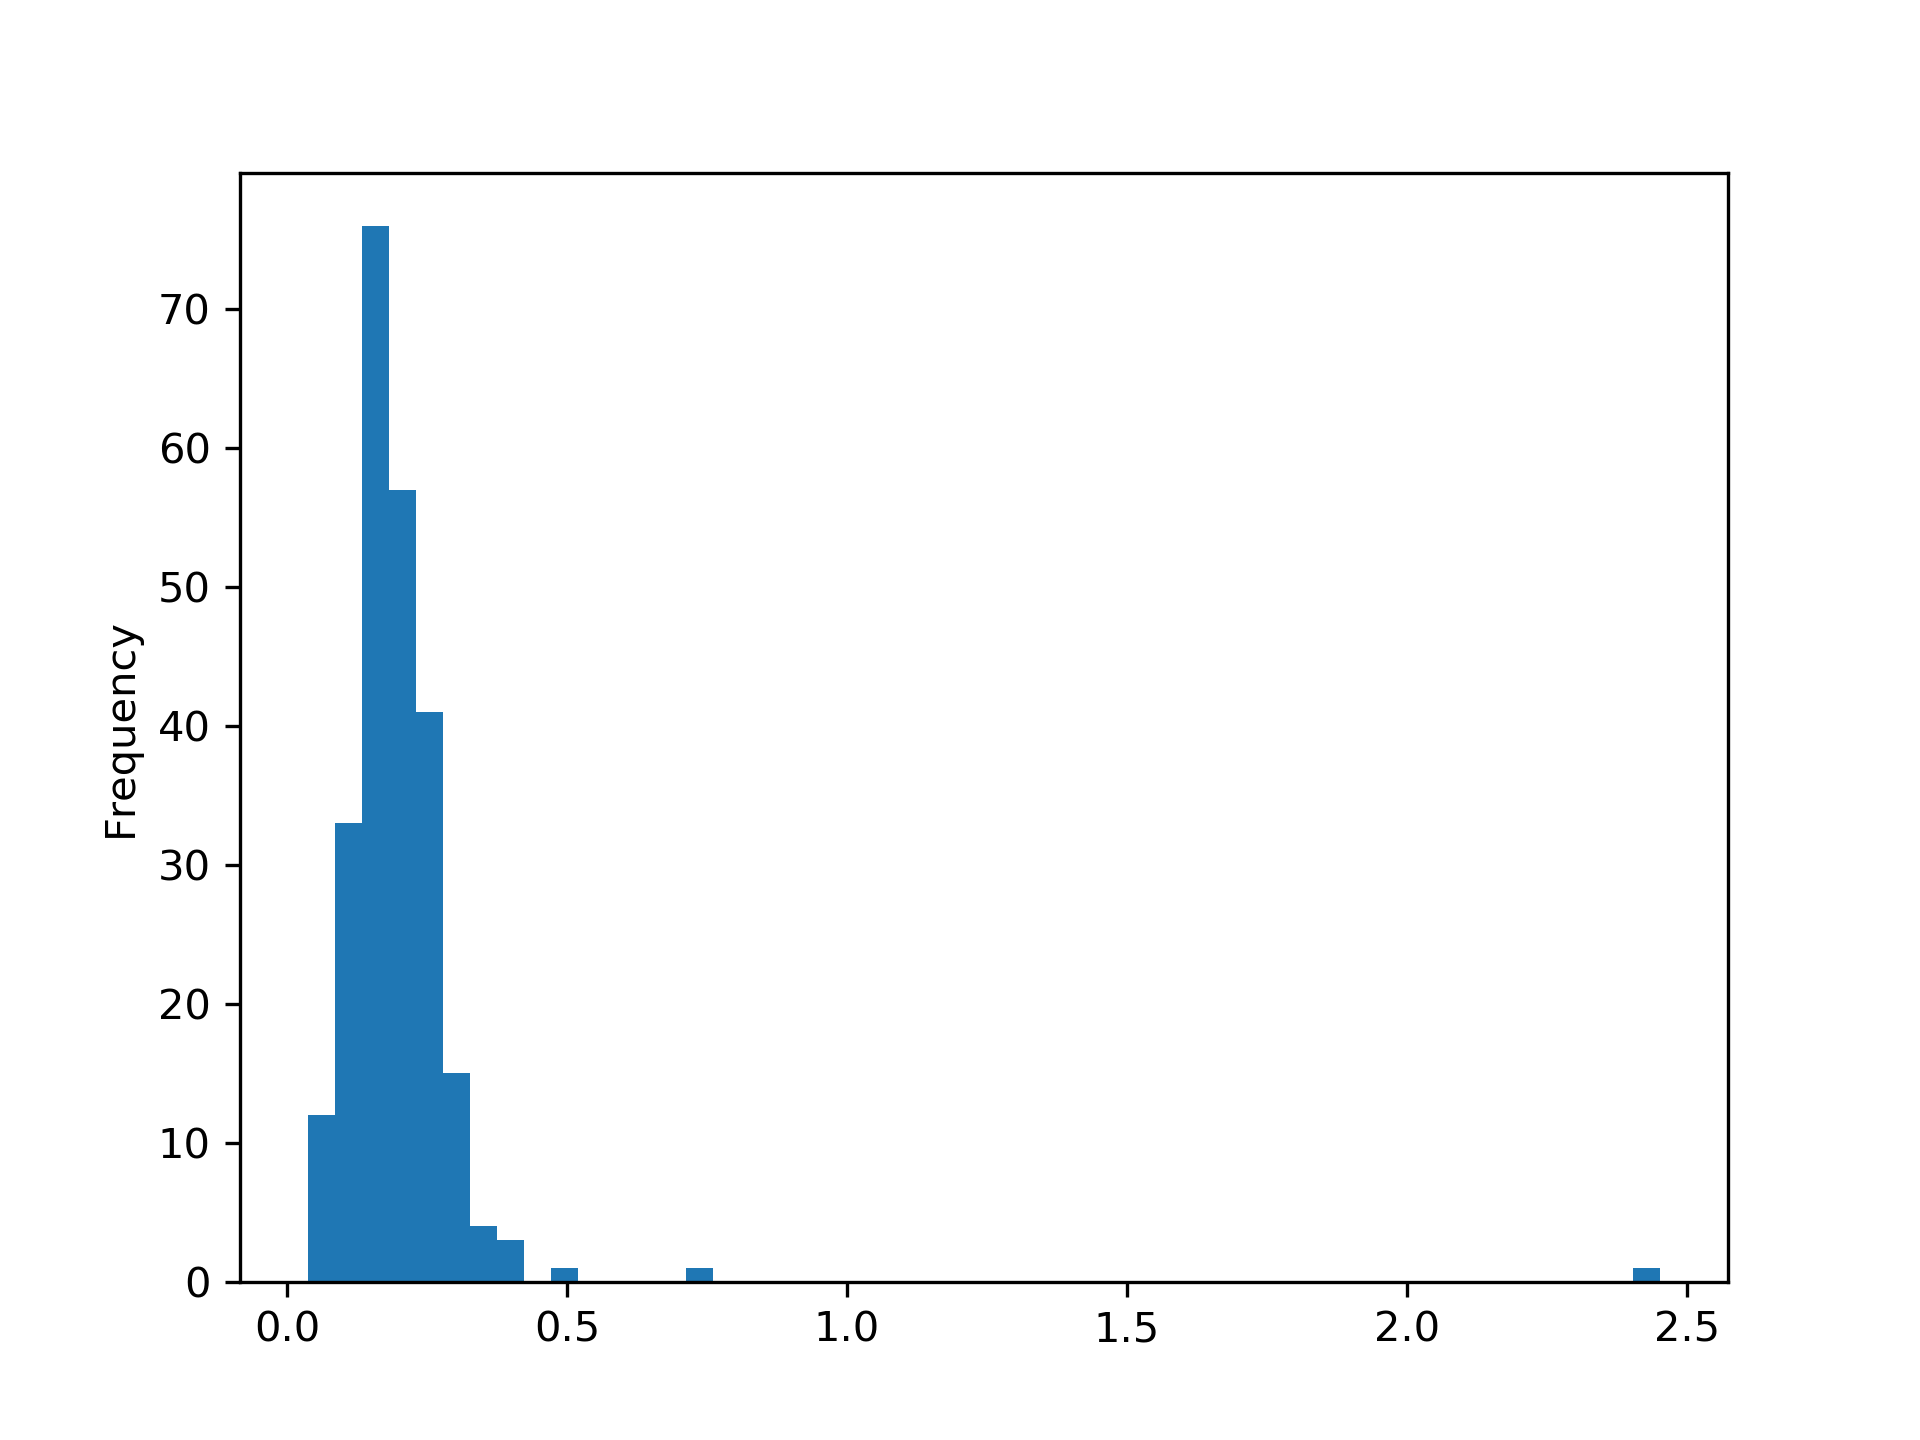

In [146]:
plt.figure()
tips.tip_pct.plot.hist(bins=50)

<IPython.core.display.Javascript object>


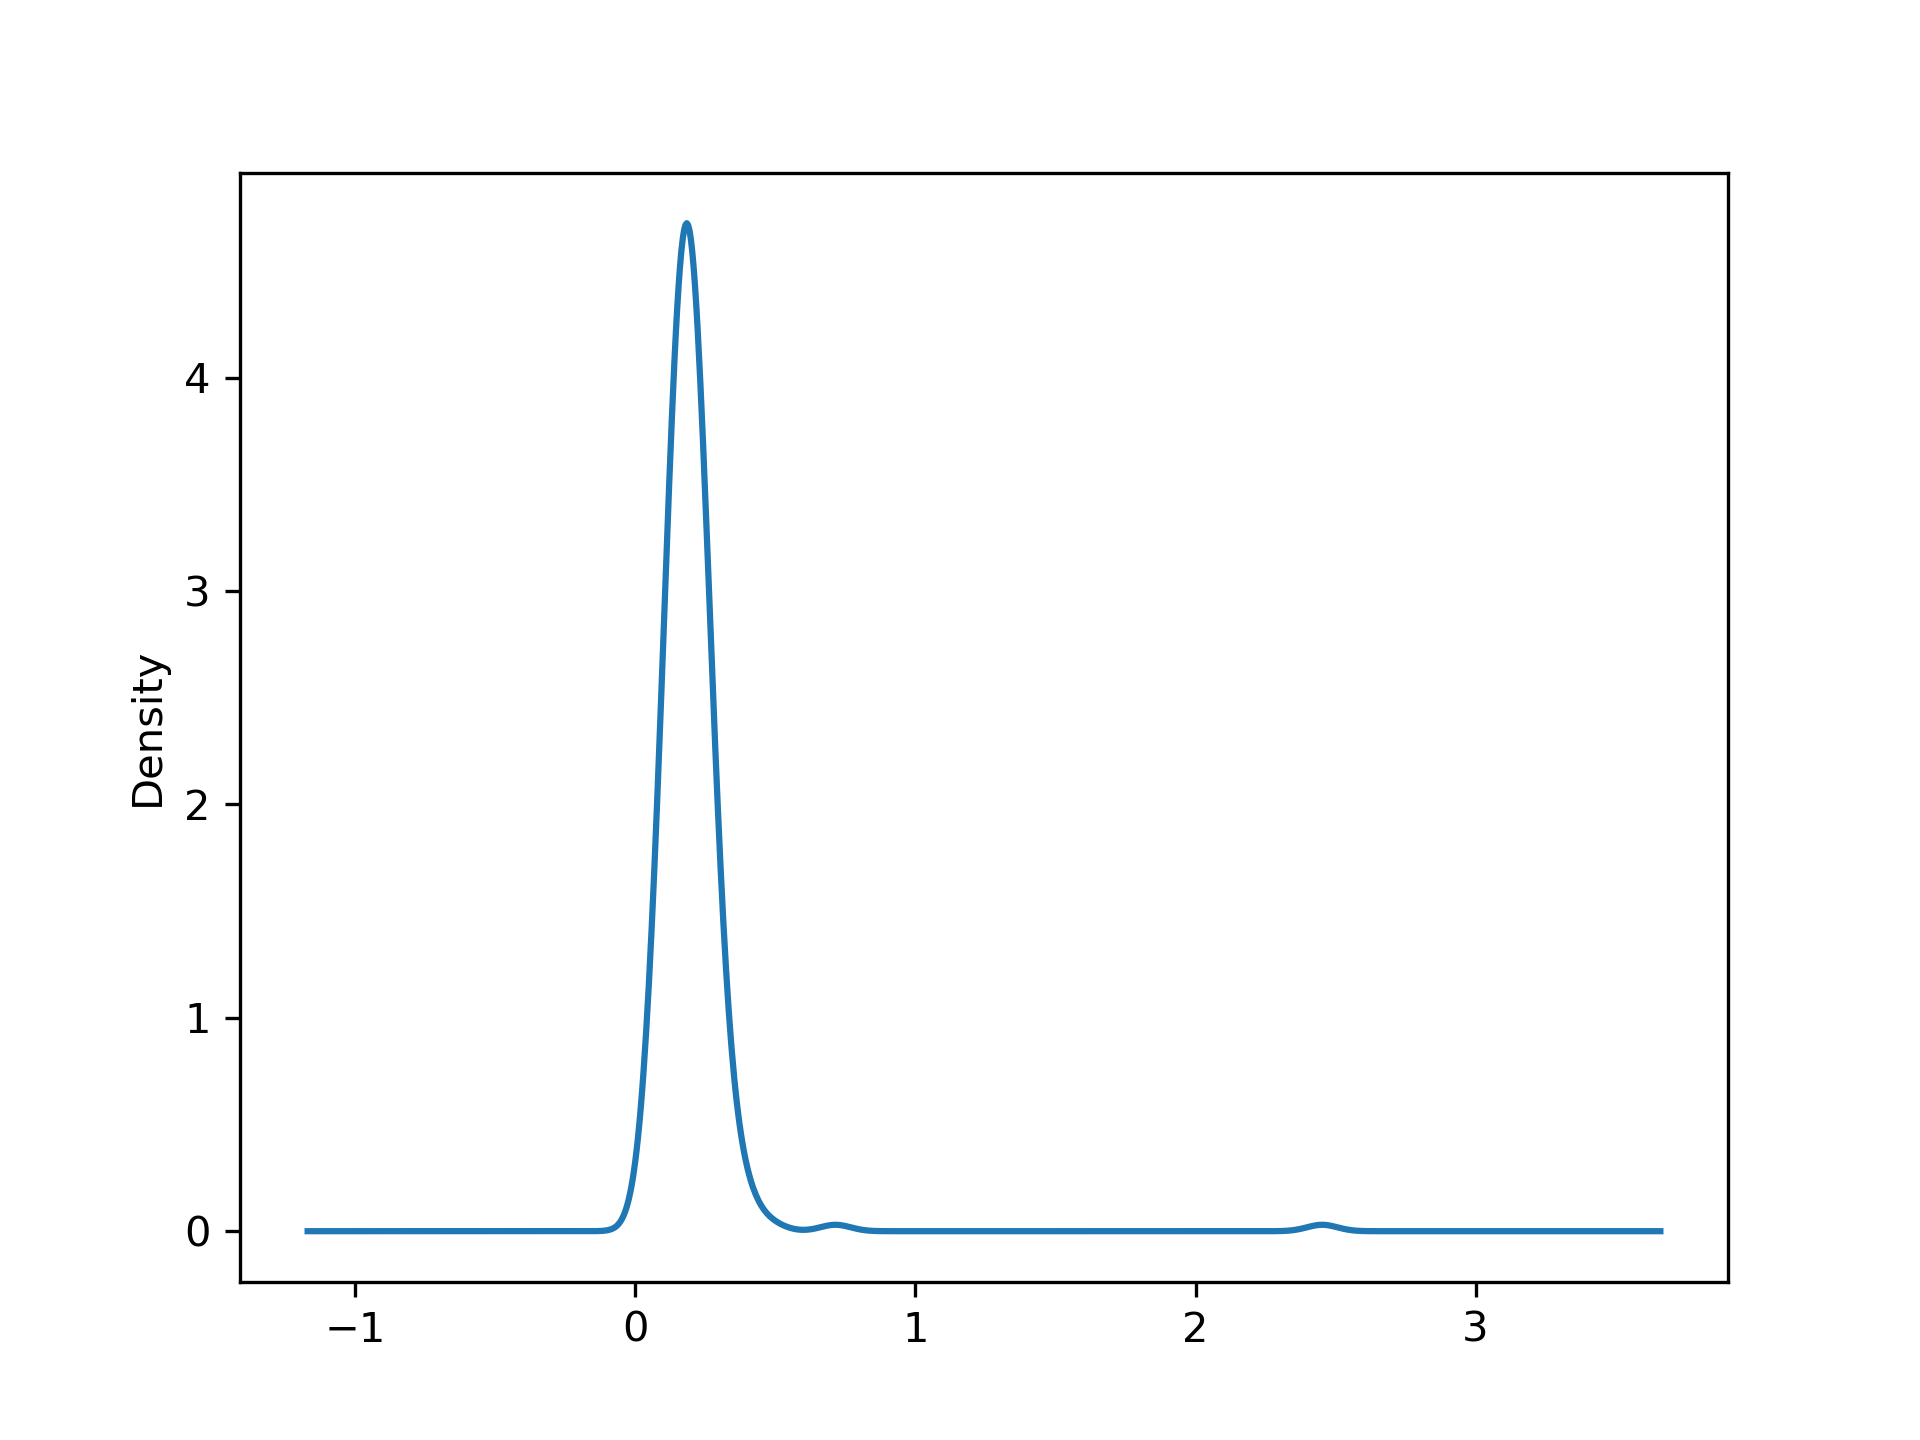

In [154]:
plt.figure()
tips.tip_pct.plot.density()

<IPython.core.display.Javascript object>


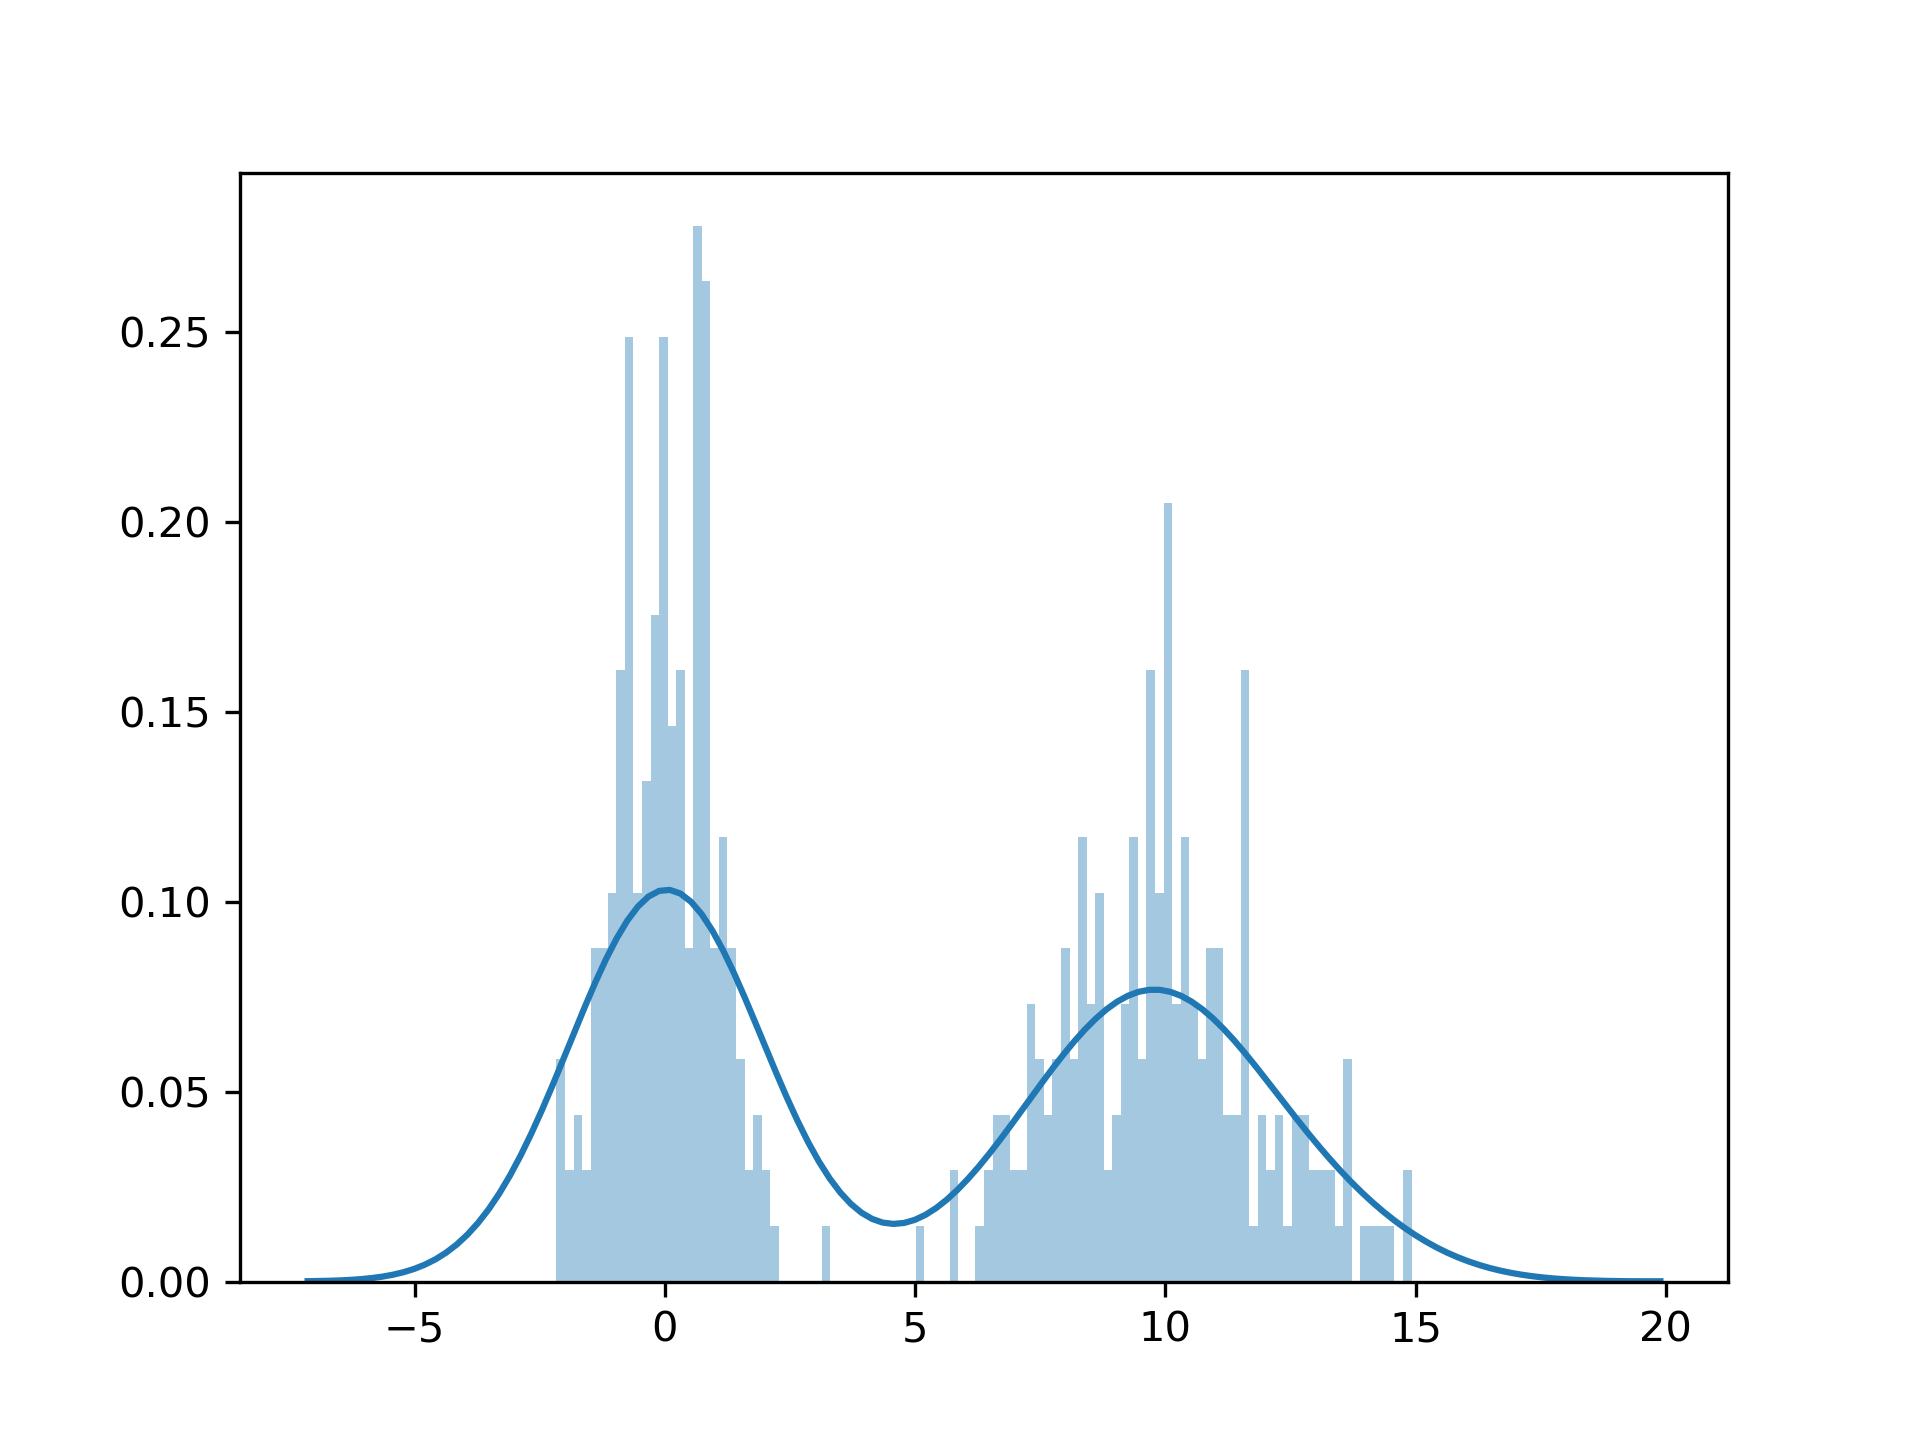

In [173]:
values=Series(np.concatenate([np.random.normal(0,1,size=200), np.random.normal(10, 2,size=200)]))
plt.figure()
sns.distplot(values,bins=100)

In [169]:
macro=pd.read_csv('../examples/macrodata.csv')
data=macro[['cpi', 'm1', 'tbilrate', 'unemp']]
data.index=macro.year.apply(lambda x:"%d"%int(x))+macro.quarter.apply(lambda x: 'Q%d'%(int(x)))
data

cpi      m1  tbilrate  unemp
1959Q1   28.980   139.7      2.82    5.8
1959Q2   29.150   141.7      3.08    5.1
1959Q3   29.350   140.5      3.82    5.3
1959Q4   29.370   140.0      4.33    5.6
1960Q1   29.540   139.6      3.50    5.2
...         ...     ...       ...    ...
2008Q3  216.889  1474.7      1.17    6.0
2008Q4  212.174  1576.5      0.12    6.9
2009Q1  212.671  1592.8      0.22    8.1
2009Q2  214.469  1653.6      0.18    9.2
2009Q3  216.385  1673.9      0.12    9.6

[203 rows x 4 columns]

In [170]:
trans_data=np.log(data).diff().dropna()
trans_data

cpi        m1  tbilrate     unemp
1959Q2  0.005849  0.014215  0.088193 -0.128617
1959Q3  0.006838 -0.008505  0.215321  0.038466
1959Q4  0.000681 -0.003565  0.125317  0.055060
1960Q1  0.005772 -0.002861 -0.212805 -0.074108
1960Q2  0.000338  0.004289 -0.266946  0.000000
...          ...       ...       ...       ...
2008Q3 -0.007904  0.045361 -0.396881  0.105361
2008Q4 -0.021979  0.066753 -2.277267  0.139762
2009Q1  0.002340  0.010286  0.606136  0.160343
2009Q2  0.008419  0.037461 -0.200671  0.127339
2009Q3  0.008894  0.012202 -0.405465  0.042560

[202 rows x 4 columns]

<IPython.core.display.Javascript object>


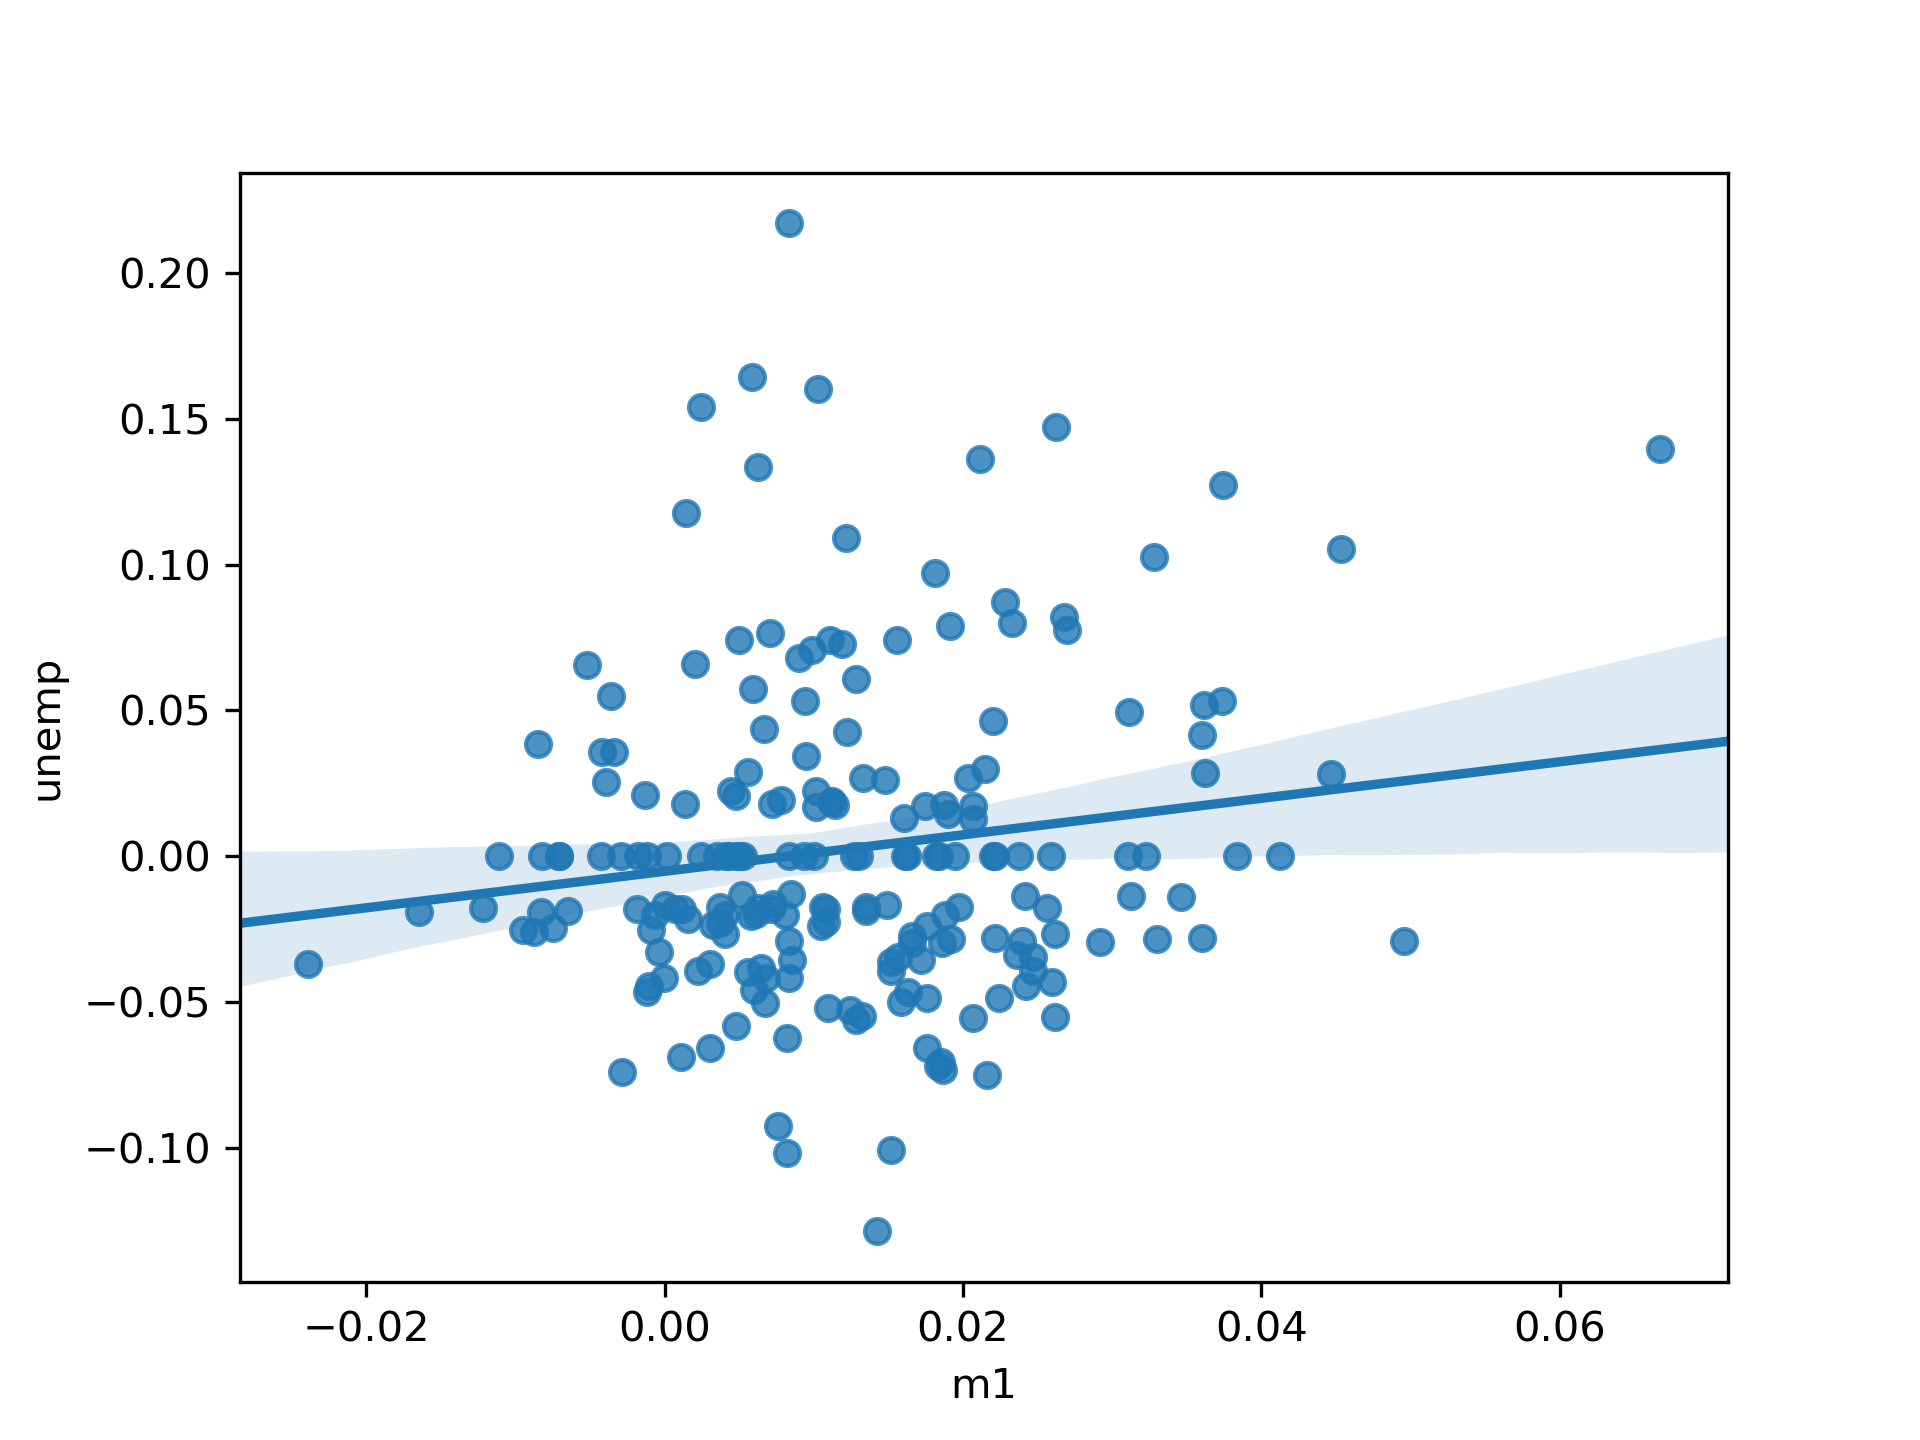

In [184]:
plt.figure()
sns.regplot('m1', 'unemp',data=trans_data)

<IPython.core.display.Javascript object>


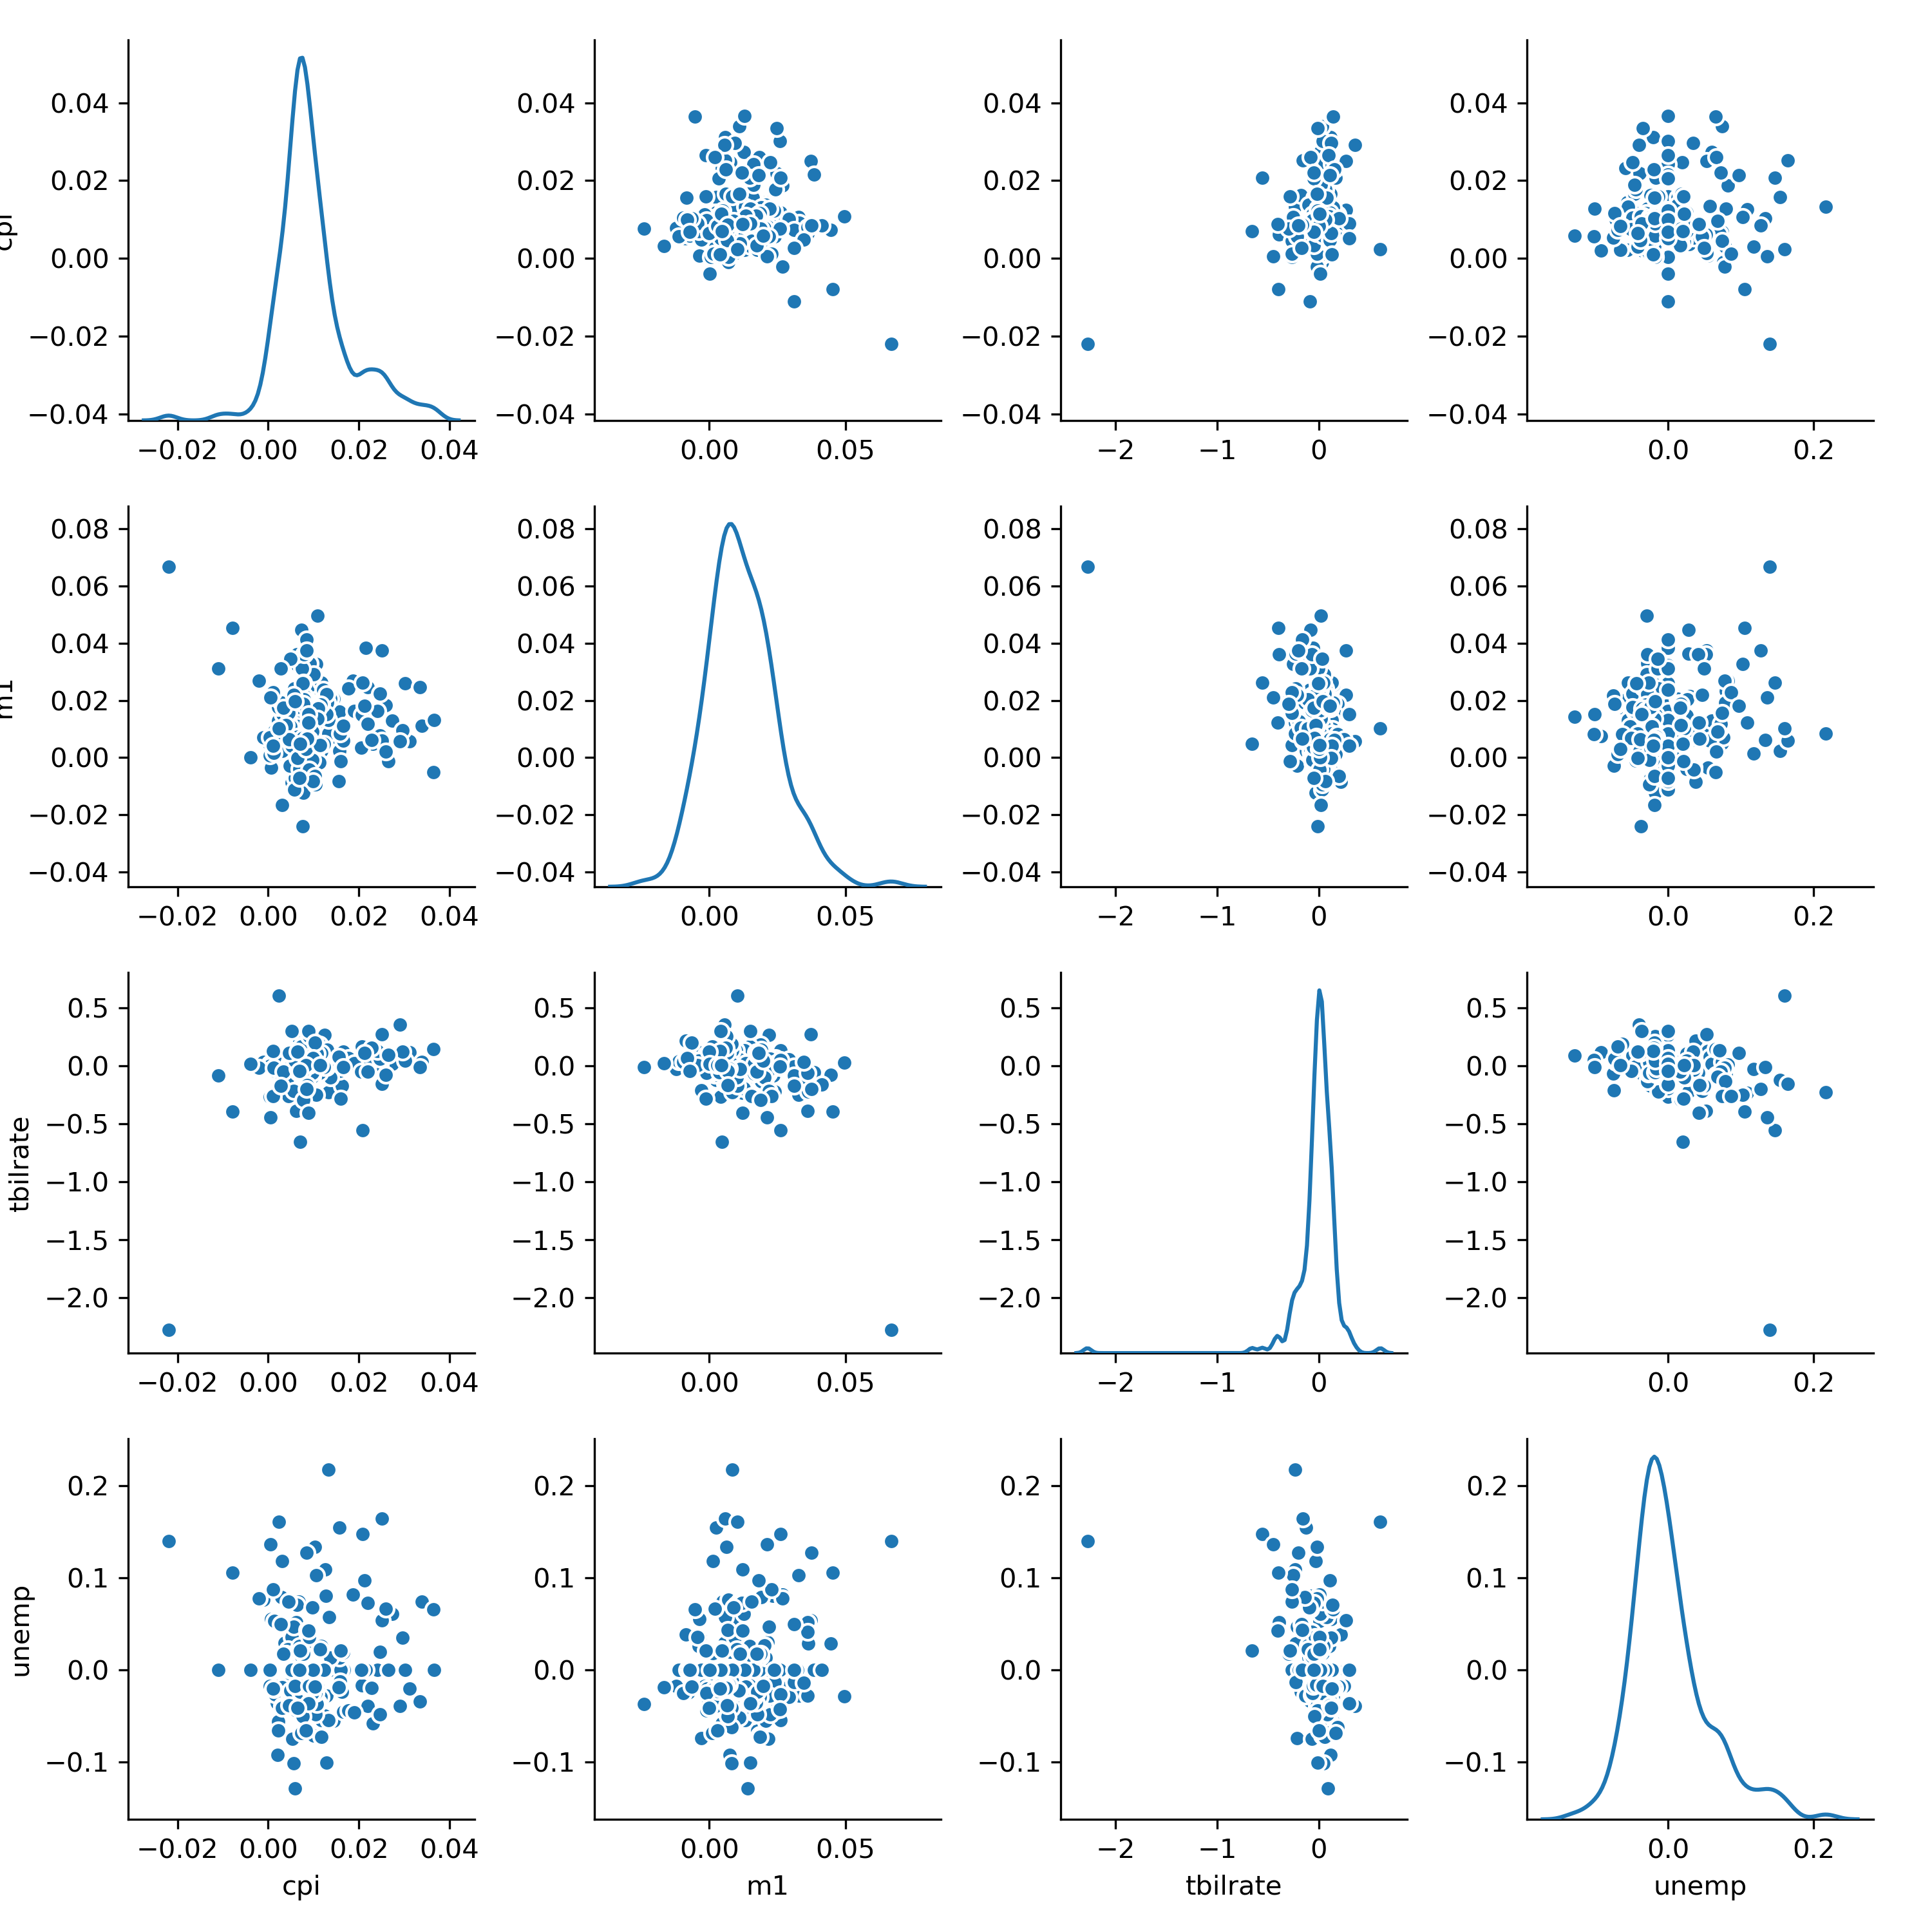

In [185]:
sns.pairplot(trans_data, diag_kind='kde')

<IPython.core.display.Javascript object>


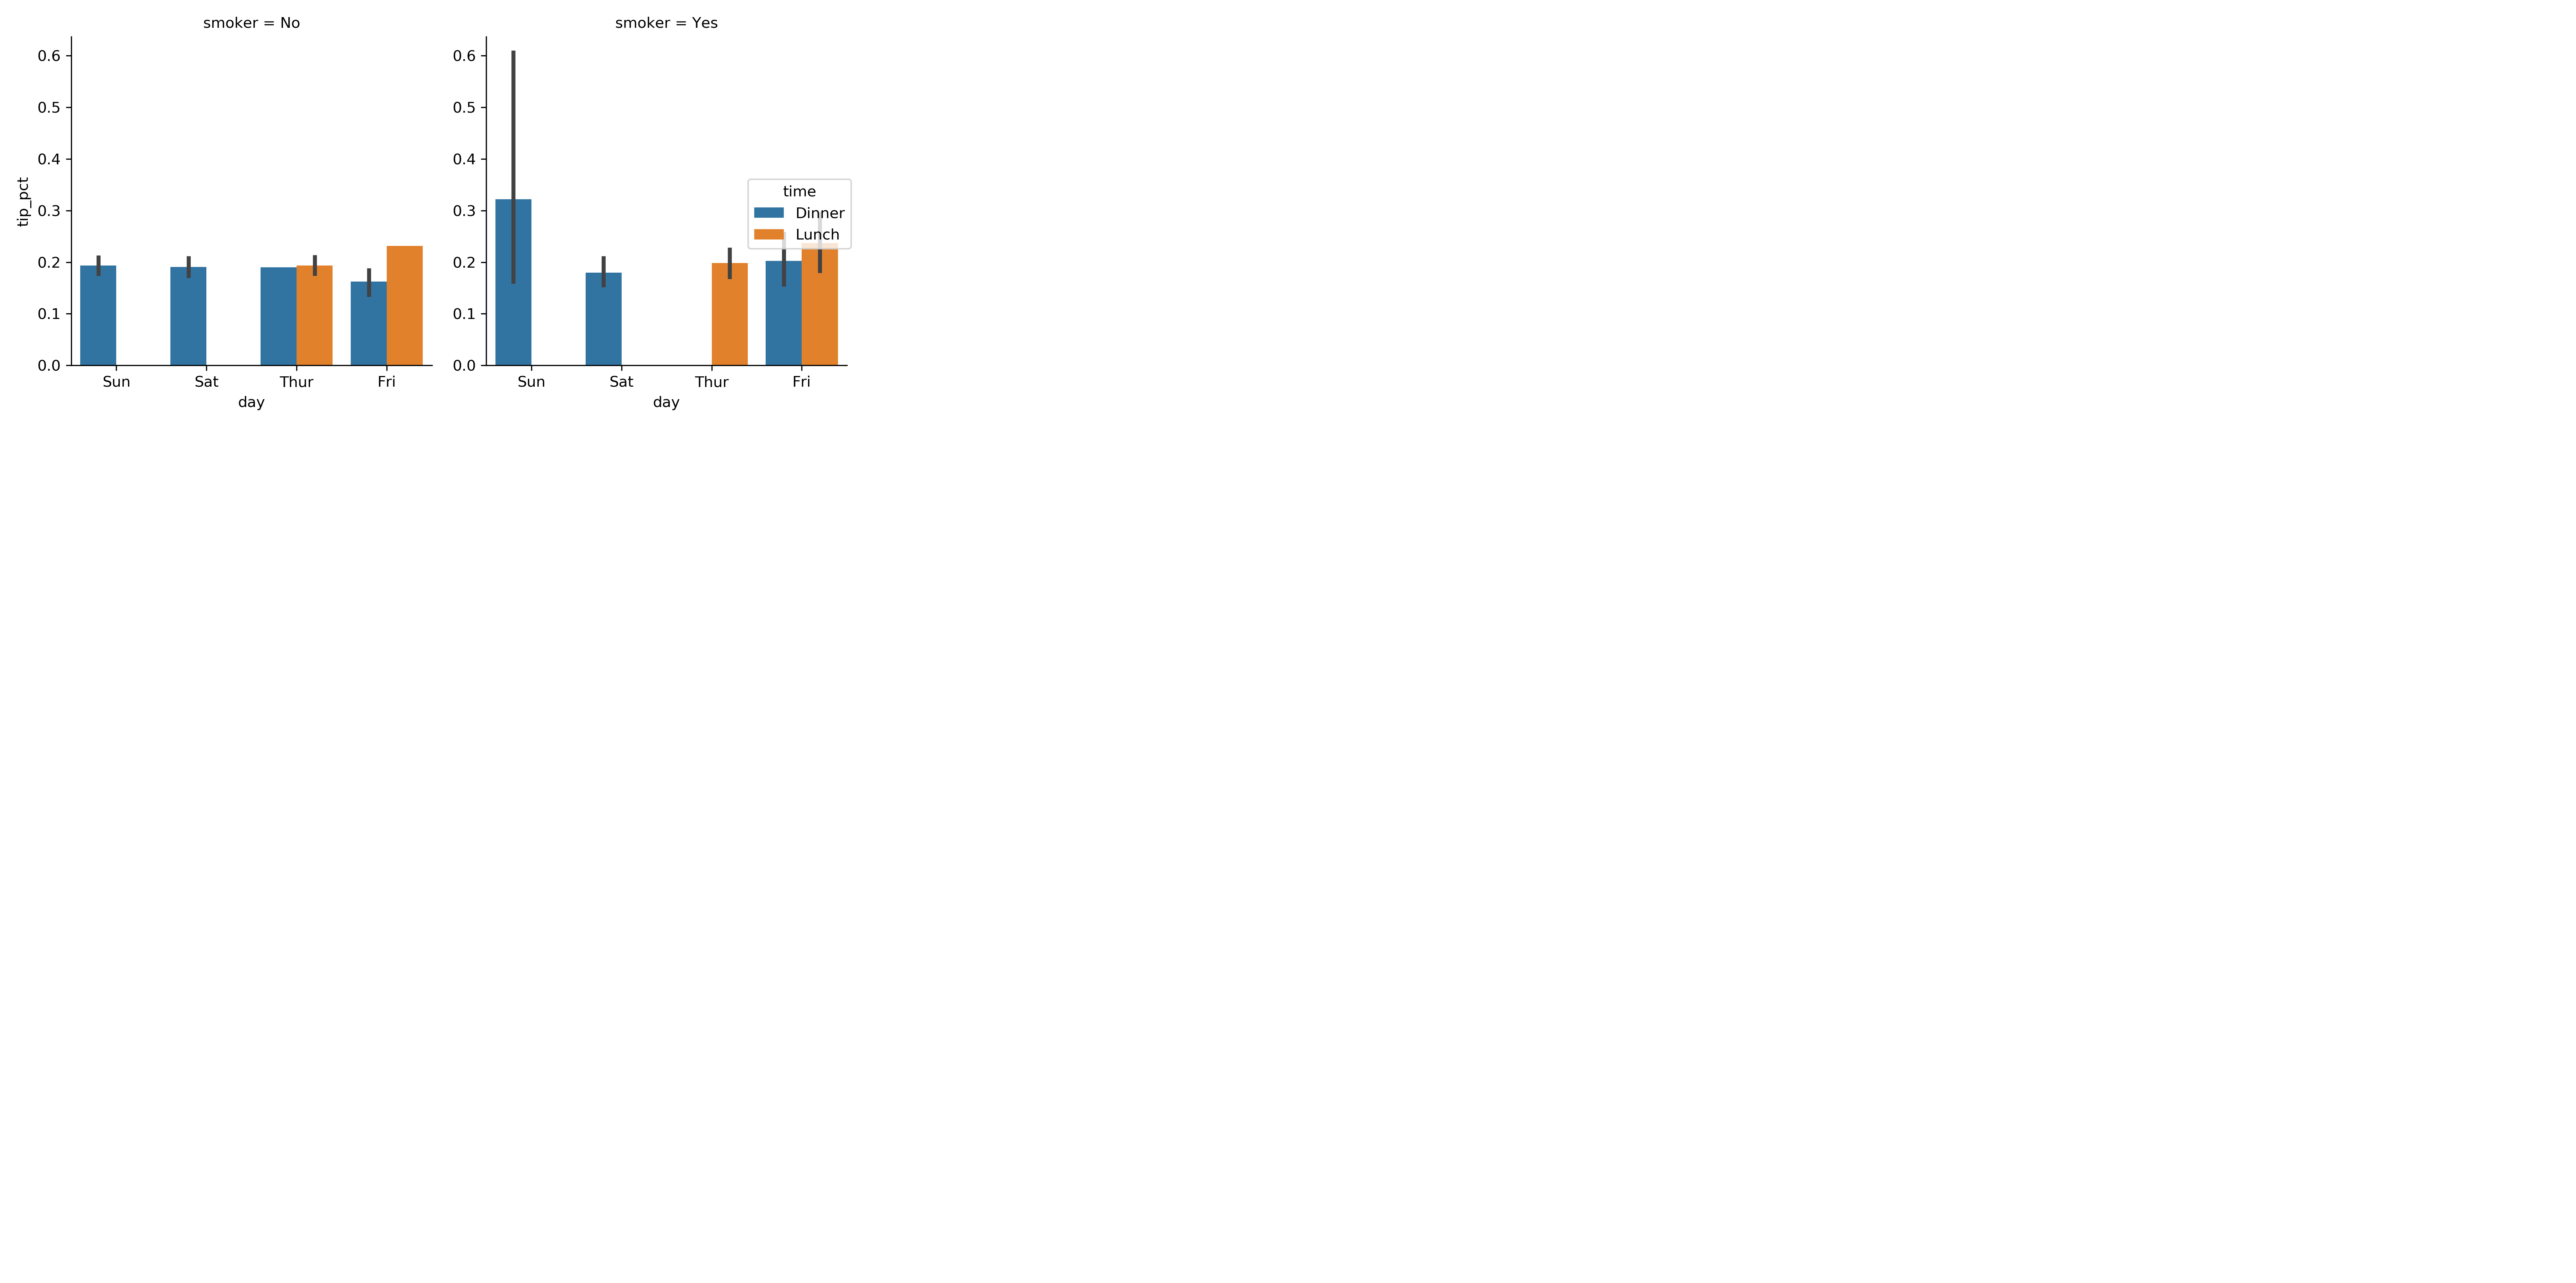

/Users/fengp/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


In [180]:
b

<IPython.core.display.Javascript object>


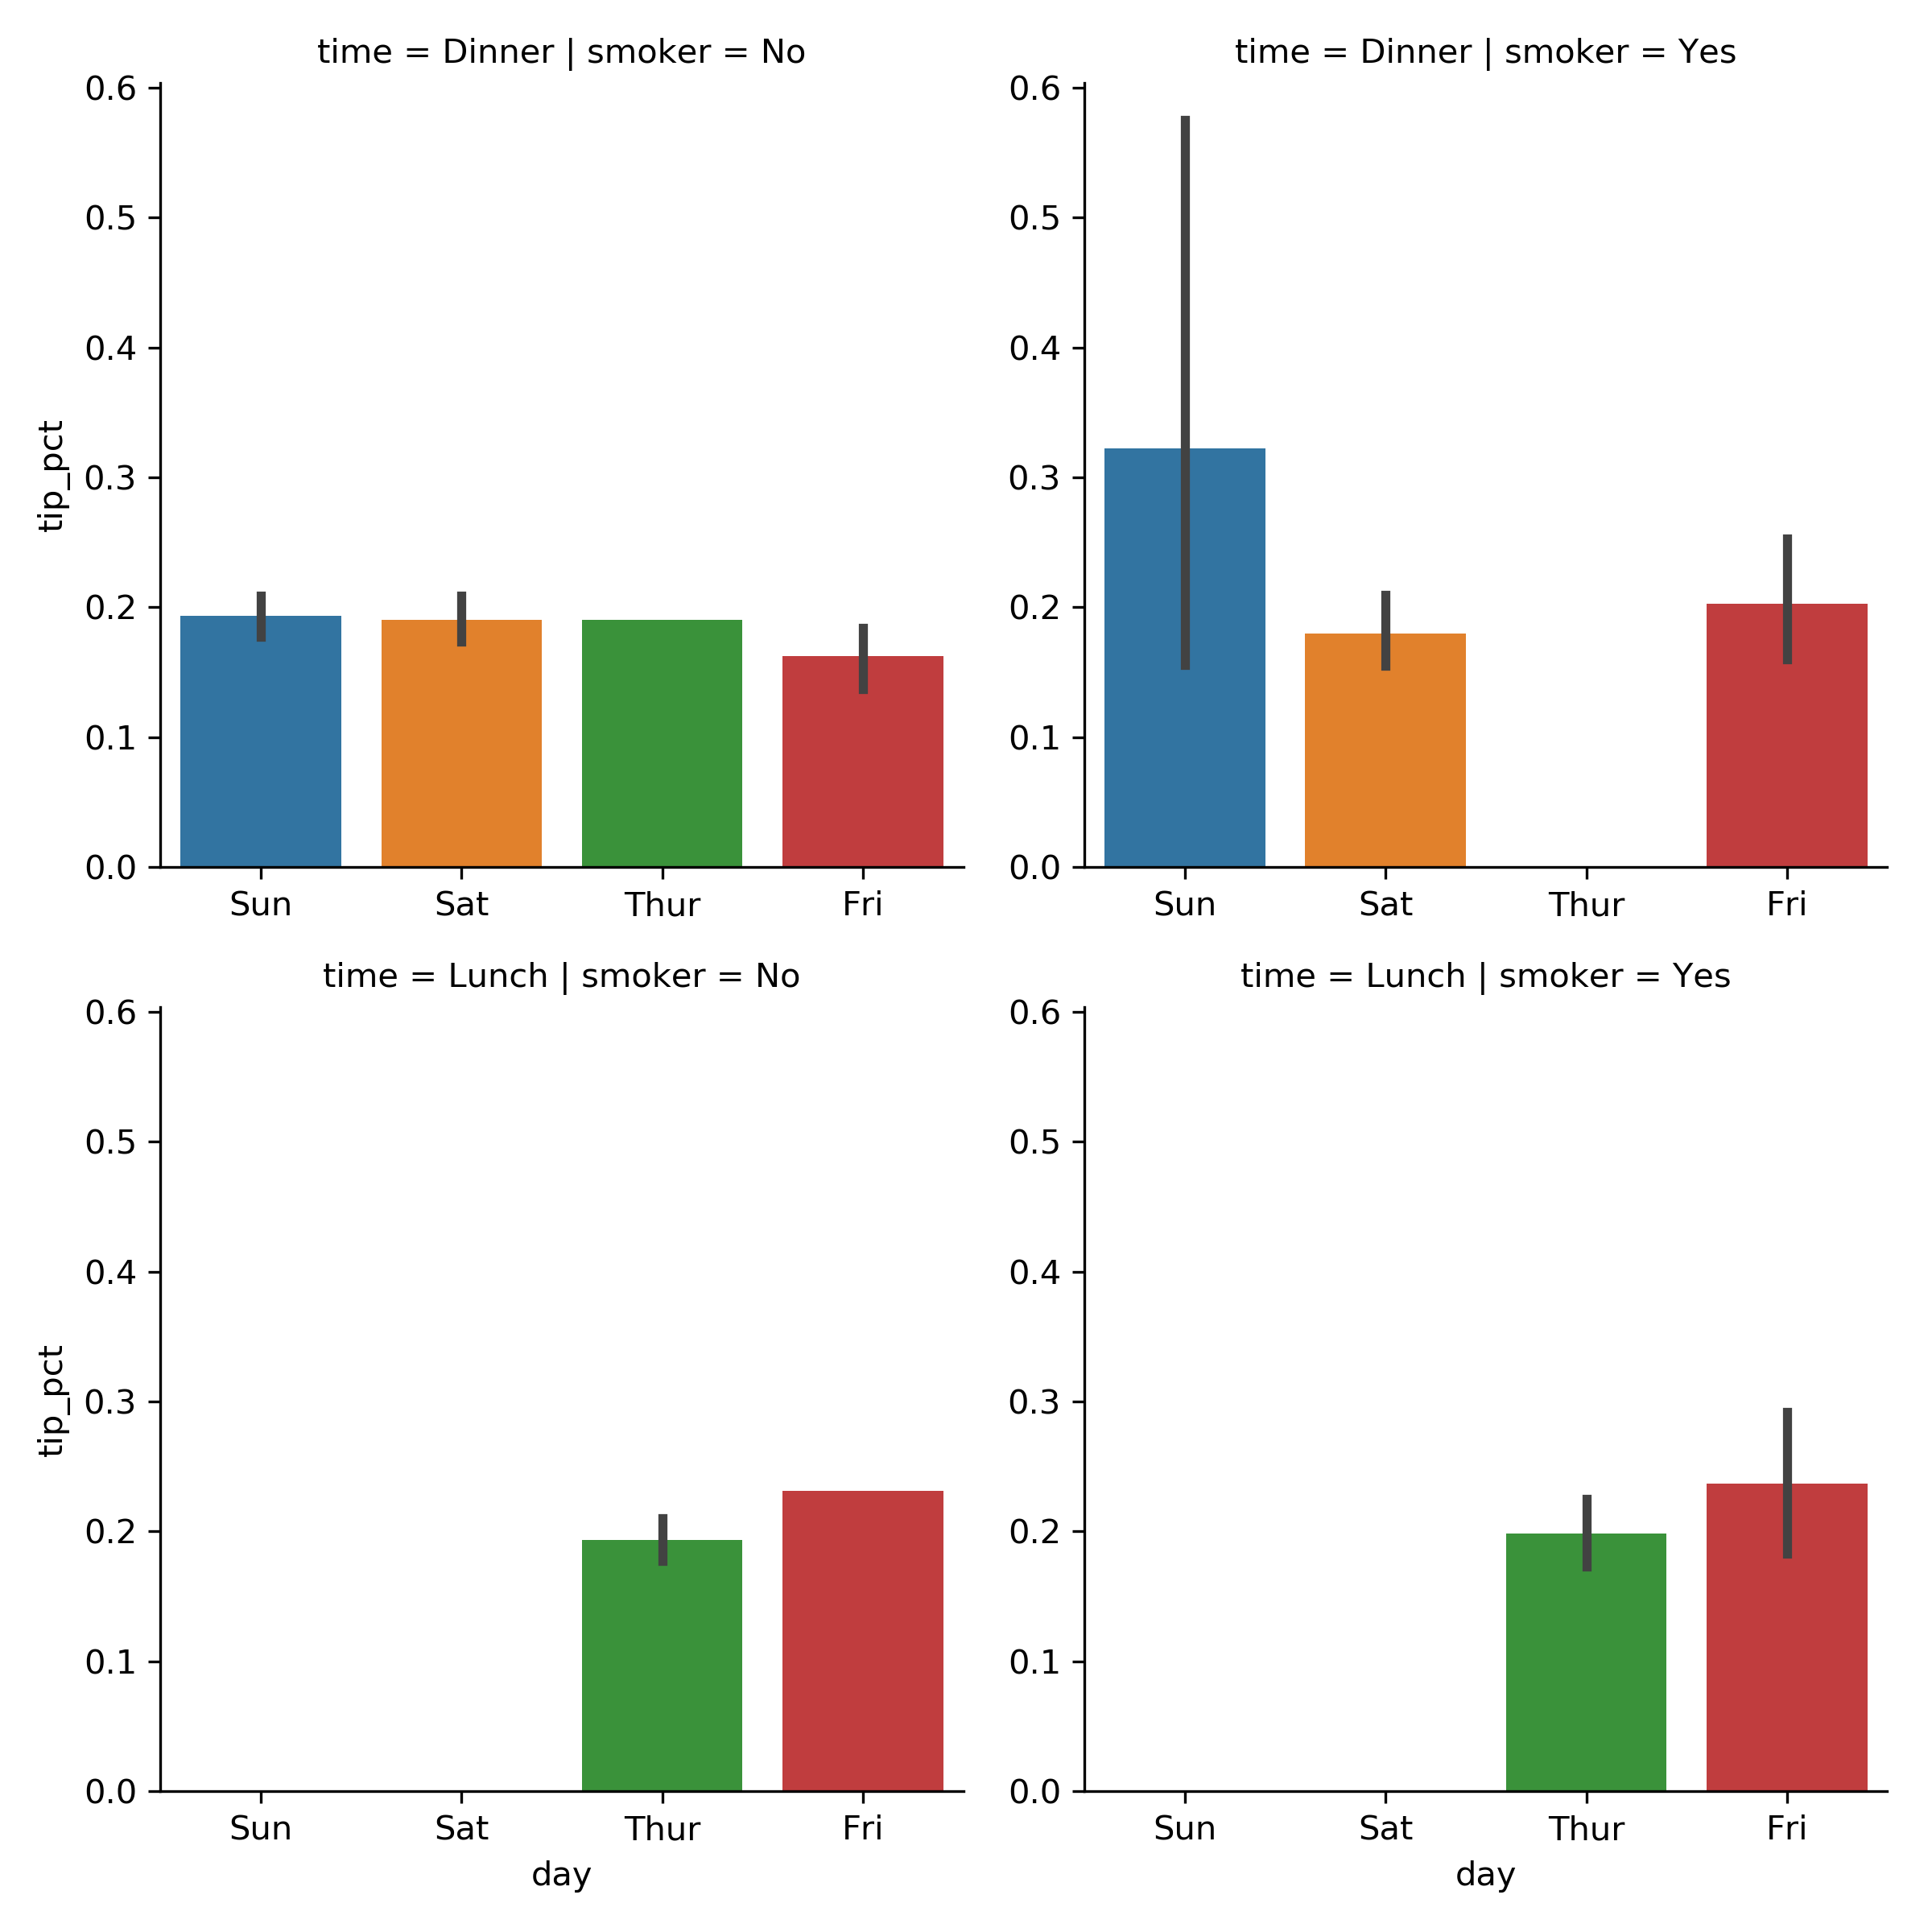

/Users/fengp/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


In [186]:
sns.factorplot(x='day',y='tip_pct',row='time',col='smoker',kind='bar',data=tips)